Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 42

In [1]:
num_days_R_prediction=42

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=num_days_R_prediction #=num_days_R_prediction #Minimum=42 days #Number of Past days on training # max to be on 6.Feb.2020

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                               NaN                    Laos  19.856270   
241                               NaN                   Libya  26.335100   
242                               NaN      West Bank and Gaza  31.952200   
243                               NaN           Guinea-Bissau  11.803700   
244                               NaN                    Mali  17.570692   
245                               NaN   Saint Kitts and Nevis  17.357822   
246             Northwest Territories                  Canada  64.825500   
247                             Yukon                  Canada  64.282300   
248                               NaN                  Kosovo  42.602636   
249                               NaN                   Burma  21.916200   
250                          Anguilla          United Kingdom  18.220600   
251            British Virgin Islands          United Kingdom  18.420700   
252          Turks and Caicos Islands          United Kingdom  21.694000   
253                               NaN              MS Zaandam   0.000000   
254                               NaN                Botswana -22.328500   
255                               NaN                 Burundi  -3.373100   
256                               NaN            Sierra Leone   8.460555   
257  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
258                               NaN                  Malawi -13.25430

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/8/20  \
185        0        0        0        0        0        0  ...    1166   
186        0        0        0        0        0        0  ...    1485   
187        0        0        0        0        0        0  ...      57   
188        0        0        0        0        0        0  ...    1339   
189        0        0        0        0        0        0  ...    5963   
190        0        0        0        0        0        0  ...       2   
191        0        0        0        0        0        0  ...       0   
192        0        0        0        0        0        0  ...       0   
193        0        0        0        0        0        0  ...      42   
194        0        0        0        0        0        0  ...     746   

     6/9/20  6/10/20  6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  \
185    1183     1206     1215     1222     1237     1247     1256   
186    1492     1497     1504     1505     1512     1517     1520   
187      62       66       69       70       70       73       76   
188    1354     1360     1369     1380     1394     1410     1427   
189    6134     6350     6522     6705     6819     6938     7081   
190       2        2        2        2        2        2        2   
191       0        0        0        0        0        0        0   
192       0        0        0        0        0        0        0   
193      42       42       42       42       42       42       42   
194     783      819      857      893      932      972     1011   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 152 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/8/20  6/9/20  6/10/20  \
175        0        0        0        0  ...    3793    4152     5640   
176        0        0        0        0  ...   35018   36308    36308   
177        0        0        0        0  ...   10401   10561    10977   
178        0        0        0        0  ...       8       8        8   
179        0        0        0        0  ...     603     604      619   
180        0        0        0        0  ...   89556   92929    98031   
181        0        0        0        0  ...    4637    4736     4895   
182        0        0        0        0  ...   12998   13196    13411   
183        0        0        0        0  ...   21156   21339    21742   
184        0        0        0        0  ...   45935   47569    49413   

     6/11/20  6/12/20  6/13/20  6/14/20  6/15/20   Population   \
175     6623     7489     7530     8454     9533     4,636,000   
176    40247    40247    50056    53721    56390   197,000,000   
177    10977    13759    13759    13766    13766     4,299,739   
178        8        8        8        8        8           NaN   
179      624      633      647      650      673     7,111,652   
180   102429   107133   111724   115579   119409    32,870,710   
181     5165     5454     5706     5954     6252   104,900,000   
182    13696    13805    14104    14226    14383    37,980,000   
183    22002    22200    22438    22669    22852    10,290,000   
184    51331    53296    55252    56898    58681     2,870,256   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 152 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/8/20  \
185        0        0        0        0        0        0  ...   27160   
186        0        0        0        0        0        0  ...   34885   
187        0        0        0        0        0        0  ...   70158   
188        0        0        0        0        0        0  ...   20604   
189        0        0        0        0        0        0  ...  476043   
190        0        0        0        0        0        0  ...     451   
191        0        0        0        0        0        0  ...      19   
192        0        0        0        0        0        0  ...      27   
193        0        0        0        0        0        0  ...     687   
194        0        0        0        0        0        0  ...  105283   

     6/9/20  6/10/20  6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  \
185   27560    27842    28201    28577    29017    29392    29788   
186   35306    35600    35910    36180    36463    36690    37036   
187   71879    73595    75071    76588    78416    79602    80876   
188   20749    20945    21182    21404    21679    21999    22165   
189  484630   493023   501800   510761   519458   528267   536484   
190     463      476      494      510      541      582      612   
191      19       19       19       19       19       19       19   
192      27       27       27       27       27       27       27   
193     688      691      691      694      694      694      694   
194  108571   112288   116021   119942   123308   127541   132048   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 152 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   6/8/20   6/9/20  6/10/20  \
220        0        0        0        0  ...      171      176      180   
221        0        0        0        0  ...      564      565      565   
222        0        0        0        0  ...      176      176      176   
223        0        0        0        0  ...      336      336      336   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...   287399   289140   290143   
226        0        0        0        0  ...      845      846      847   
227        2        2        5        5  ...  1961781  1979868  2000702   
228        0        0        0        0  ...     4440     4520     4623   
229        0        0        0        0  ...     2473     2632     2738   

     6/11/20  6/12/20  6/13/20  6/14/20  6/15/20   Population   \
220      186      187      187      187      187           NaN   
221      565      565      565      565      568       173,519   
222      176      176      176      176      176        33,693   
223      336      336      336      336      336        84,939   
224       11       11       11       11       11         4,991   
225   291409   292950   294375   295889   296857    66,440,000   
226      847      847      847      848      848     3,471,150   
227  2023590  2048986  2074526  2094058  2114026   327,200,000   
228     4741     4869     4966     5080     5263    33,363,556   
229     2814     2879     2904     2978     3062           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 152 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

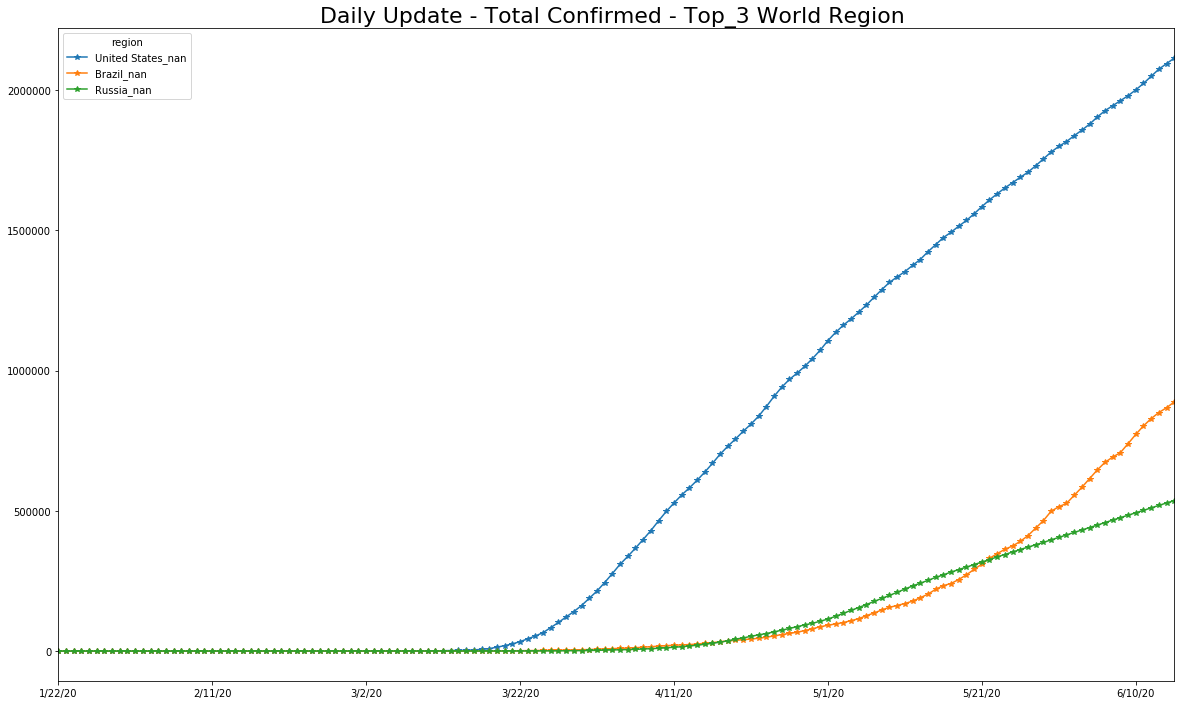

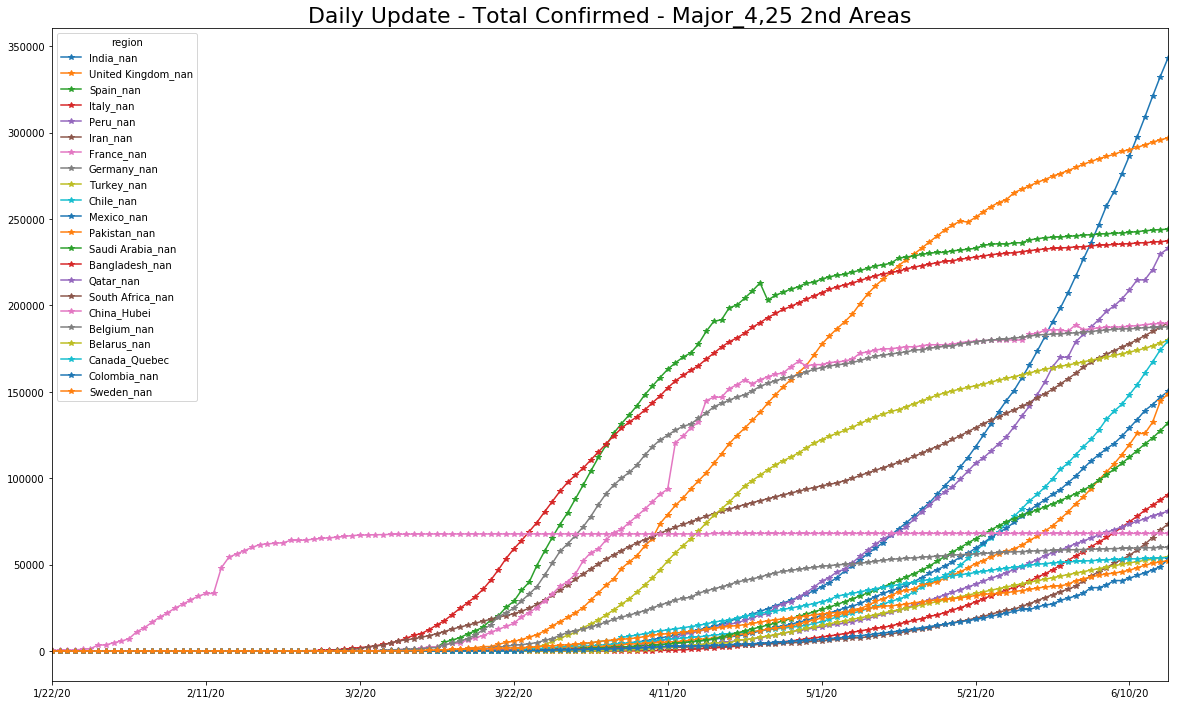

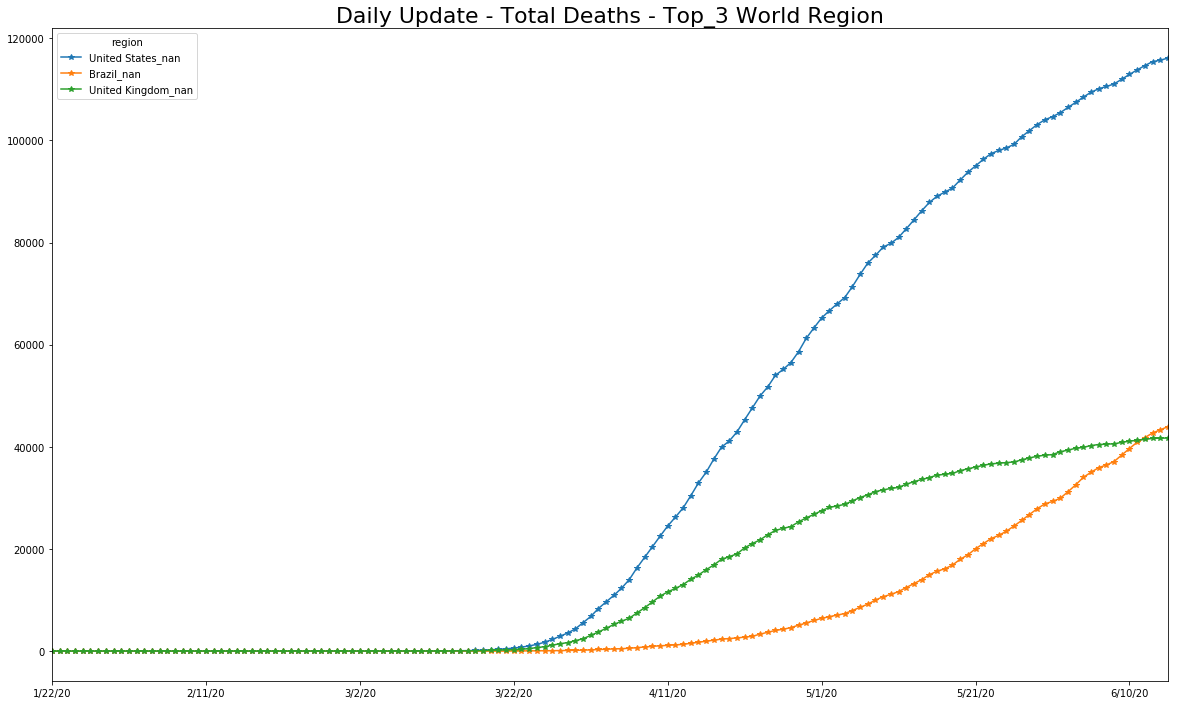

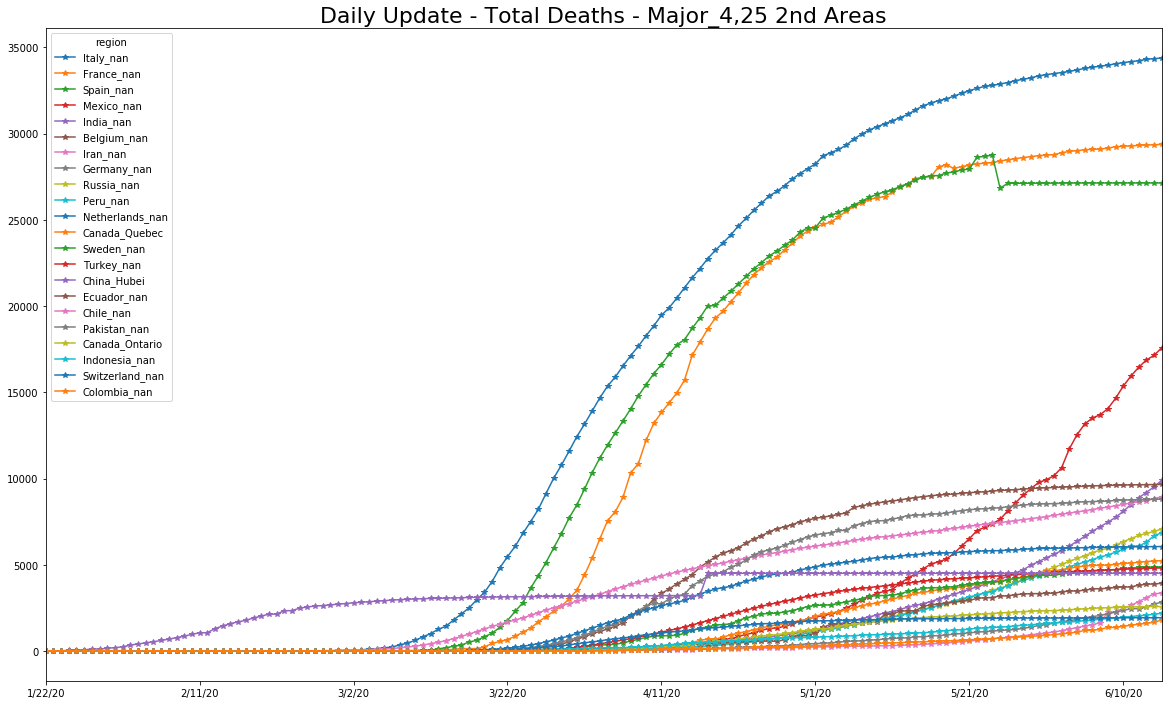

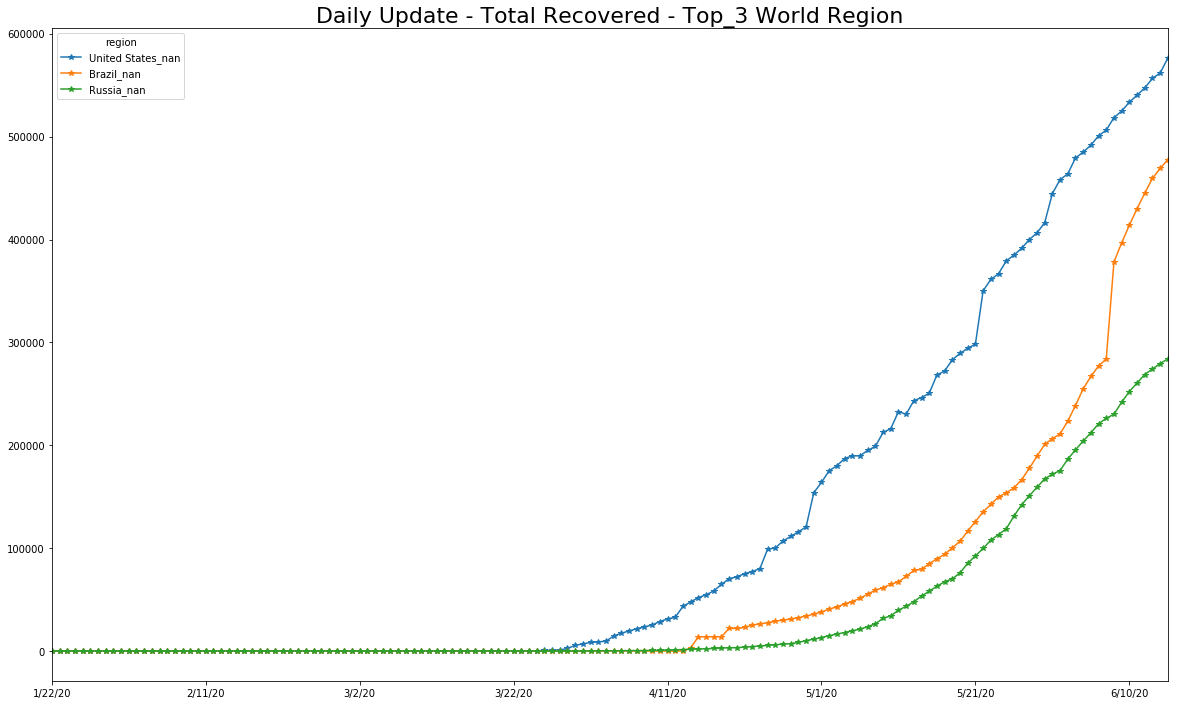

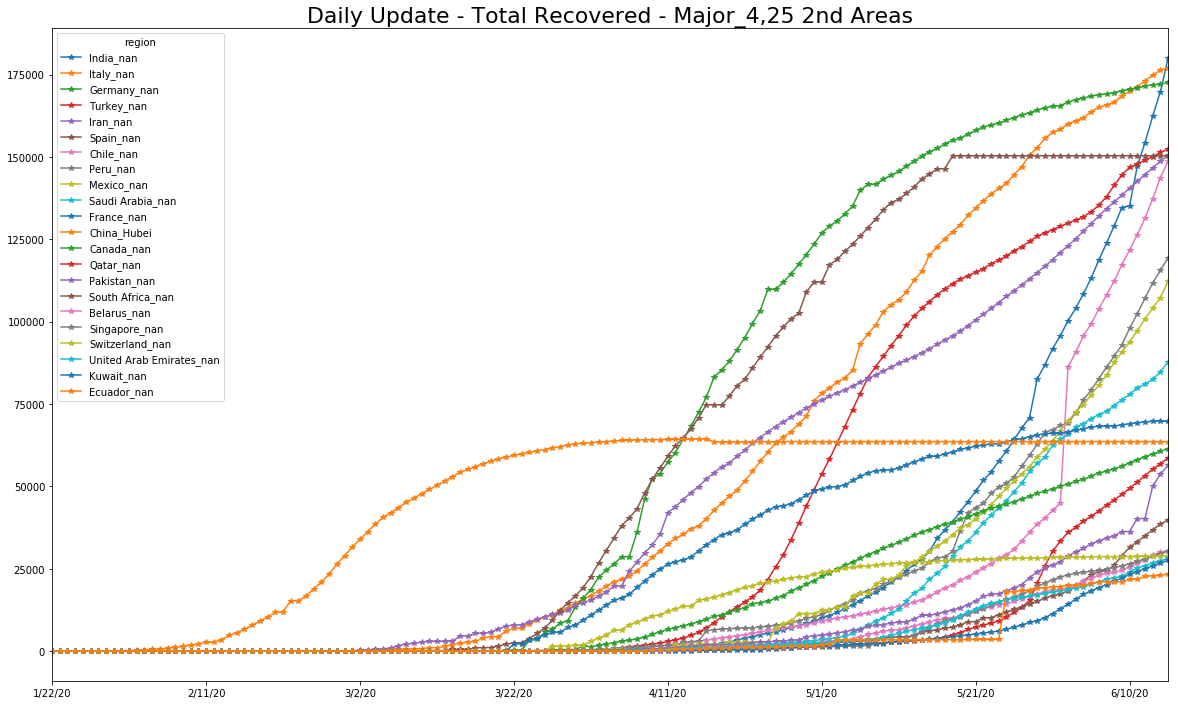

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/06/16


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[15:]
ts_d=ts_d[15:]
ts_rec=ts_rec[15:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/6/20                0            0            0            0           0   
2/7/20                0            0            0            0           0   
2/8/20                0            0            0            0           0   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/6/20                        0              0            0   
2/7/20                        0              0            0   
2/8/20                        0              0            0   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
2/6/20                                       0                          4   
2/7/20                                       0                          4   
2/8/20                                       0                          4   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/6/20  ...                 11            0               0              0   
2/7/20  ...                 11            0               0              0   
2/8/20  ...                 11            0               0              0   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/6/20           10                       0                   0          0   
2/7/20           10                       0                   0          0   
2/8/20           13                       0                   0          0   

region  Zambia_nan  Zimbabwe_nan  
2/6/20           0             0  
2/7/20           0             0  
2/8/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
6/12/20            23546         1416        10698          853         130   
6/13/20            24102         1464        10810          853         138   
6/14/20            24766         1521        10919          853         140   
6/15/20            25527         1590        11031          853         142   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
6/12/20                       26          28764        15281   
6/13/20                       26          30295        16004   
6/14/20                       26          31577        16667   
6/15/20                       26          32785        17064   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
6/12/20                                     108                       3119   
6/13/20                                     108                       3128   
6/14/20                                     108                       3131   
6/15/20                                     108                       3134   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
6/12/20  ...            2048986          847            4869           2879   
6/13/20  ...            2074526          847            4966           2904   
6/14/20  ...            2094058          848            5080           2978   
6/15/20  ...            2114026          848            5263           3062   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
6/12/20          333                     489                   9        632   
6/13/20          334                     489                   9        705   
6/14/20          334                     492                   9        728   
6/15/20          334                     505                   9        844   

region   Zambia_nan  Zimbabwe_nan  
6/12/20        1321           343  
6/13/20        1357           356  
6/14/20        1358           383  
6/15/20        1382           387  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
19    2020-02-25  Afghanistan_nan          1             1             1   
20    2020-02-26  Afghanistan_nan          1             0             1   
21    2020-02-27  Afghanistan_nan          1             0             1   
22    2020-02-28  Afghanistan_nan          1             0             0   
23    2020-02-29  Afghanistan_nan          1             0             0   
24    2020-03-01  Afghanistan_nan          1             0             0   
25    2020-03-02  Afghanistan_nan          1             0             0   
26    2020-03-03  Afghanistan_nan          1             0             0   
27    2020-03-04  Afghanistan_nan          1             0             0   
28    2020-03-05  Afghanistan_nan          1             0             0   
29    2020-03-06  Afghanistan_nan          1             0             0   
30    2020-03-07  Afghanistan_nan          1             0             0   
31    2020-03-08  Afghanistan_nan          4             0             0   
32    2020-03-09  Afghanistan_nan          4             3             3   
33    2020-03-10  Afghanistan_nan          5             0             3   
34    2020-03-11  Afghanistan_nan          7             1             4   
35    2020-03-12  Afghanistan_nan          7             2             3   
36    2020-03-13  Afghanistan_nan          7             0             3   
37    2020-03-14  Afghanistan_nan         11             0             2   
38    2020-03-15  Afghanistan_nan         16             4             4   
39    2020-03-16  Afghanistan_nan         21             5             9   
40    2020-03-17  Afghanistan_nan         22             5            14   
41    2020-03-18  Afghanistan_nan         22             1            11   
42    2020-03-19  Afghanistan_nan         22             0             6   
43    2020-03-20  Afghanistan_nan         24             0             1   
44    2020-03-21  Afghanistan_nan         24             2             2   
45    2020-03-22  Afghanistan_nan         40             0             2   
46    2020-03-23  Afghanistan_nan         40            16            18   
47    2020-03-24  Afghanistan_nan         74             0            16   
48    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
35346 2020-05-18     Zimbabwe_nan         46             2             7   
35347 2020-05-19     Zimbabwe_nan         46             2             4   
35348 2020-05-20     Zimbabwe_nan         48             0             4   
35349 2020-05-21     Zimbabwe_nan         51             2             4   
35350 2020-05-22     Zimbabwe_nan         51             3             5   
35351 2020-05-23     Zimbabwe_nan         56             0             5   
35352 2020-05-24     Zimbabwe_nan         56             5             8   
35353 2020-05-25     Zimbabwe_nan         56             0             5   
35354 2020-05-26     Zimbabwe_nan         56             0             5   
35355 2020-05-27     Zimbabwe_nan        132             0             0   
35356 2020-05-28     Zimbabwe_nan        149            76            76   
35357 2020-05-29     Zimbabwe_nan        149            17            93   
35358 2020-05-30     Zimbabwe_nan        174             0            93   
35359 2020-05-31     Zimbabwe_nan        178            25            42   
35360 2020-06-01     Zimbabwe_nan        203             4            29   
35361 2020-06-02     Zimbabwe_nan        206            25            54   
35362 2020-06-03     Zimbabwe_nan        222             3            32   
35363 2020-06-04     Zimbabwe_nan        237            16            44   
35364 2020-06-05     Zimbabwe_nan        265            15            34   
35365 2020-06-06     Zimbabwe_nan        279            28            59   
35366 2020-06-07     Zimbabwe_nan        282            14  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
35375 2020-06-16  Zimbabwe_nan          0             4            44   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
35375           100         101.046997         112.830904          134.84669   

       last_day  kalman_prediction  population  infected_rate  min  max  
35375       387              402.0    14862924   2.610522e-07  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="Shared -- Ratio in Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage_infected_rate_confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage_factor_9.8_10_infected_rate_confirmed']=ratiod['infected_rate']*100*9.8
ratiod['delta_new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta_new_cases_per_1M_hab']=ratiod['delta_new_cases']/ratiod['population']*1000000

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
35373  2020-06-14  Zimbabwe_nan        383            13            36   
35374  2020-06-15  Zimbabwe_nan        387            27            51   
35375  2020-06-16  Zimbabwe_nan          0             4            44   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
35373            77         103.793003         111.253125         127.602151   
35374           101         107.587079         115.364458         135.819149   
35375           100         101.046997         112.830904         134.846690   

       last_day  kalman_prediction  population  infected_rate  min  max  \
35373       356              368.0    14862924   2.401950e-07  NaN  NaN   
35374       383              389.0    14862924   2.583610e-07  NaN  NaN   
35375       387              402.0    14862924   2.610522e-07  NaN  NaN   

       population_percentage_infected_rate_confirmed  \
35373                                       0.000024   
35374                                       0.000026   
35375                                       0.000026   

       population_percentage_factor_9.8_10_infected_rate_confirmed  \
35373                                           0.000235             
35374                                           0.000253             
35375                                           0.000256             

       delta_new_cases  delta_new_cases_per_1M_hab  
35373             12.0                    0.807378  
35374              6.0                    0.403689  
35375             15.0                    1.009223

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  3.489093e+10  186791.147906  20020.610687


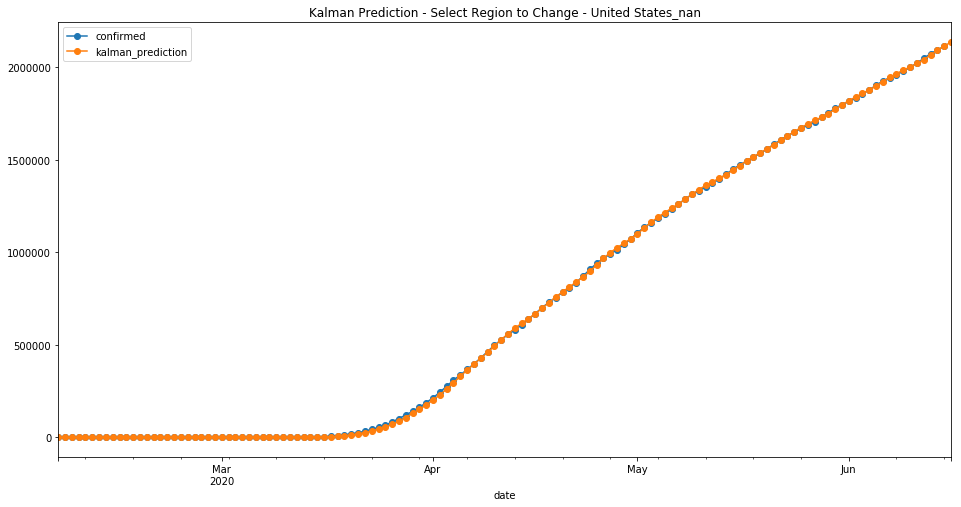

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  2.272690e+09  47672.737336  4900.816794


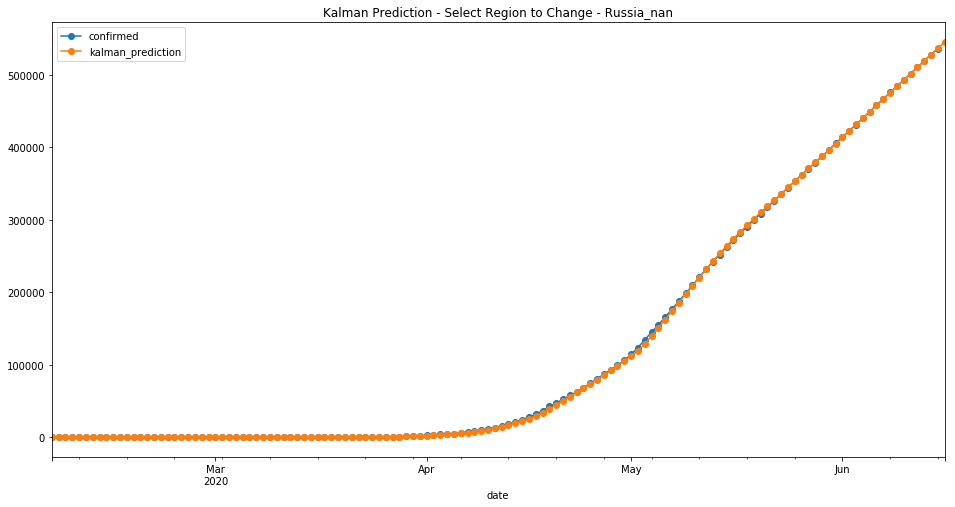

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
30  Brazil_nan  6.451054e+09  80318.452564  9394.465649


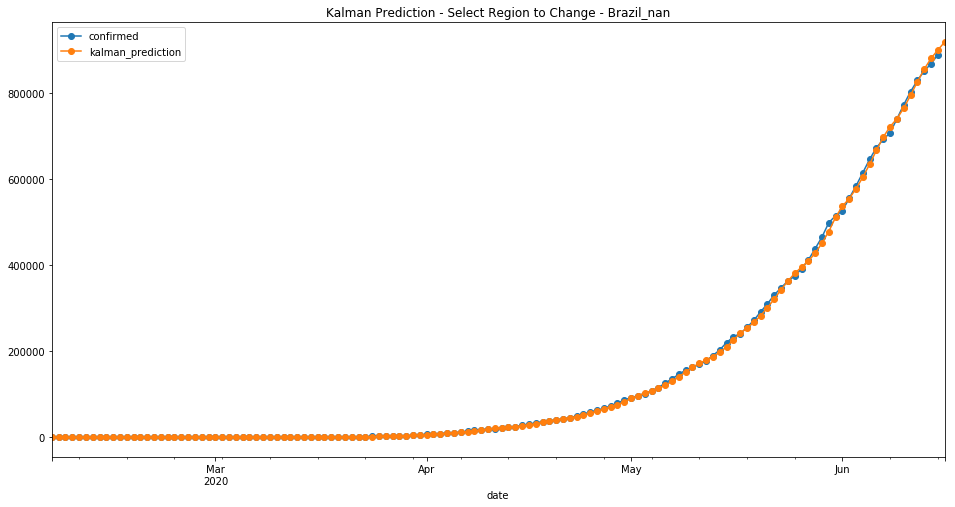

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse         mae
255  United Kingdom_nan  6.806753e+08  26089.754635  2983.59542


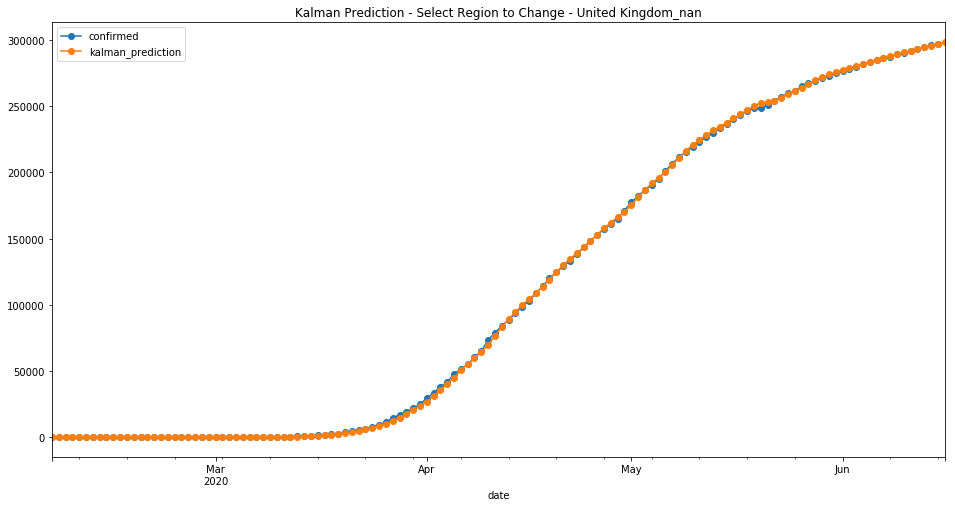

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O cluster uptime:         1 day 5 hours 42 mins
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 7 months and 20 days !!!
H2O cluster name:           H2O_from_python_unknownUser_7hydhv
H2O cluster total nodes:    1
H2O cluster free memory:    3.791 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 42 training day 6weeks.
#
if number_past_days_training>=42 :
    ntraindays=number_past_days_training 
else : 
    ntraindays=42
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-05-05
last_train_date= 2020-06-15
first_bootstrap_date= 2020-06-07
boost_bootstrap_date= 2020-06-12
first_test_date= 2020-06-06
last_test_date= 2020-06-16
first_valid_date= 2020-06-14


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   20209.0      20342 2020-06-07  Afghanistan_nan
1   21160.0      20917 2020-06-08  Afghanistan_nan
2   21622.0      21459 2020-06-09  Afghanistan_nan
3   22145.0      22142 2020-06-10  Afghanistan_nan
4   22914.0      22890 2020-06-11  Afghanistan_nan
5   23664.0      23546 2020-06-12  Afghanistan_nan
6   24234.0      24102 2020-06-13  Afghanistan_nan
7   24736.0      24766 2020-06-14  Afghanistan_nan
8   25475.0      25527 2020-06-15  Afghanistan_nan
9   26281.0          0 2020-06-16  Afghanistan_nan
10   1256.0       1246 2020-06-07      Albania_nan
11   1266.0       1263 2020-06-08      Albania_nan
12   1285.0       1299 2020-06-09      Albania_nan
13   1332.0       1341 2020-06-10      Albania_nan
14   1375.0       1385 2020-06-11      Albania_nan
15   1421.0       1416 2020-06-12      Albania_nan
16   1446.0       1464 2020-06-13      Albania_nan
17   1508.0       1521 2020-06-14      Albania_nan
18   1572.0       1590 2020-06-15      Albania_nan
19   1649.0          0 2020-06-16      Albania_nan
20  10198.0      10154 2020-06-07      Algeria_nan
21  10291.0      10265 2020-06-08      Algeria_nan
22  10405.0      10382 2020-06-09      Algeria_nan
23  10525.0      10484 2020-06-10      Algeria_nan
24  10617.0      10589 2020-06-11      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175   9236.0       9218 2020-06-12  Azerbaijan_nan
176   9561.0       9570 2020-06-13  Azerbaijan_nan
177   9924.0       9957 2020-06-14  Azerbaijan_nan
178  10333.0      10324 2020-06-15  Azerbaijan_nan
179  10686.0          0 2020-06-16  Azerbaijan_nan
180    109.0        103 2020-06-07     Bahamas_nan
181    108.0        103 2020-06-08     Bahamas_nan
182    108.0        103 2020-06-09     Bahamas_nan
183    109.0        103 2020-06-10     Bahamas_nan
184    109.0        103 2020-06-11     Bahamas_nan
185    109.0        103 2020-06-12     Bahamas_nan
186    109.0        103 2020-06-13     Bahamas_nan
187    108.0        103 2020-06-14     Bahamas_nan
188    108.0        103 2020-06-15     Bahamas_nan
189    108.0          0 2020-06-16     Bahamas_nan
190  14923.0      14763 2020-06-07     Bahrain_nan
191  15210.0      15417 2020-06-08     Bahrain_nan
192  16042.0      15731 2020-06-09     Bahrain_nan
193  16148.0      16200 2020-06-10     Bahrain_nan
194  16718.0      16667 2020-06-11     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  48628.0      48630 2020-06-07  Belarus_nan
221  49503.0      49453 2020-06-08  Belarus_nan
222  50295.0      50265 2020-06-09  Belarus_nan
223  51107.0      51066 2020-06-10  Belarus_nan
224  51904.0      51816 2020-06-11  Belarus_nan
225  52619.0      52520 2020-06-12  Belarus_nan
226  53293.0      53241 2020-06-13  Belarus_nan
227  54018.0      53973 2020-06-14  Belarus_nan
228  54740.0      54680 2020-06-15  Belarus_nan
229  55415.0          0 2020-06-16  Belarus_nan
230  59199.0      59226 2020-06-07  Belgium_nan
231  59335.0      59348 2020-06-08  Belgium_nan
232  59440.0      59437 2020-06-09  Belgium_nan
233  59519.0      59569 2020-06-10  Belgium_nan
234  59684.0      59711 2020-06-11  Belgium_nan
235  59829.0      59819 2020-06-12  Belgium_nan
236  59913.0      59918 2020-06-13  Belgium_nan
237  60010.0      60029 2020-06-14  Belgium_nan
238  60130.0      60100 2020-06-15  Belgium_nan
239  60175.0          0 2020-06-16  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  7192678.307761281
# MSE on the validation data =  56012996387.69375
# R^2 on the training data =  0.9998472656118957
# R^2 on the validation data 0.458081276098126


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1592219991060_12


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 7192678.307761281
RMSE: 2681.9169091829226
MAE: 518.4878790426927
RMSLE: 0.3188859301829685
Mean Residual Deviance: 7192678.307761281

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 56012996387.69375
RMSE: 236670.64961184718
MAE: 59698.267329994625
RMSLE: 6.125273718270197
Mean Residual Deviance: 56012996387.69375
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-06-16 17:02:21  0.008 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-06-16 17:02:21  0.061 sec   1.0                28683.72323396319   4455.588597045664   822755978.5625995    234257.83147628323  62284.5023169424    54876731607.97071
     2020-06-16 17:02:21  0.105 sec   2.0                19912.21661173949   2768.479877069917   396496370.3928341    248024.2440415257   63801.240914139096  61516025632.37029
     2020-06-16 17:02:21  0.138 sec   3.0                16861.069731447864  2406.8612743018234  284295672.48874736   244645.84986254858  61959.99335235396   59851591854.968666
     2020-06-16 17:02:21  0.174 sec   4.0                15554.258058137597  2185.155991536251   241934943.73913836   244409.61726537056  61856.71328316483   59736061011.804924
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-06-16 17:02:25  3.958 sec   62.0               3373.6297229056304  647.4306741011883   11381377.50727232    236413.8457374131   59267.49160848455   55891506456.353355
     2020-06-16 17:02:29  7.986 sec   176.0              2889.6916110959855  565.9984506822057   8350317.607238512    236330.46701273465  59257.37387440251   55852089638.45725
     2020-06-16 17:02:33  12.009 sec  286.0              2889.4470060711533  547.2471917418777   8348904.000893551    236594.91984611333  59511.87573439173   55977156096.9888
     2020-06-16 17:02:37  16.027 sec  395.0              2699.9134022443695  526.6026570135701   7289532.379618768    236549.08074539897  59606.62636143837   55955467601.49328
     2020-06-16 17:02:41  19.958 sec  500.0              2681.9169091829226  518.4878790426927   7192678.307761281    236670.64961184718  59698.267329994625  56012996387.69375


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           3.47218e+16            1                    0.338598
kalman_prediction  2.7994e+16             0.806236             0.27299
7_day_change       1.65777e+16            0.477444             0.161662
3_day_change       8.92354e+15            0.257001             0.0870201
1_day_change       6.43982e+15            0.185469             0.0627994
region             3.05855e+15            0.0880873            0.0298262
infected_rate      2.78824e+15            0.0803022            0.0271902
1_day_change_rate  7.12268e+14            0.0205136            0.00694586
max                4.28285e+14            0.0123348            0.00417653
7_day_change_rate  3.74778e+14            0.0107937            0.00365474
min                2.68984e+14            0.00774684           0.00262306
3_day_change_rate  2.57795e+14            0.0074246            0.00251395

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         3.472181e+16           1.000000    0.338598
1   kalman_prediction         2.799398e+16           0.806236    0.272990
2        7_day_change         1.657773e+16           0.477444    0.161662
3        3_day_change         8.923541e+15           0.257001    0.087020
4        1_day_change         6.439818e+15           0.185469    0.062799
5              region         3.058550e+15           0.088087    0.029826
6       infected_rate         2.788238e+15           0.080302    0.027190
7   1_day_change_rate         7.122685e+14           0.020514    0.006946
8                 max         4.282854e+14           0.012335    0.004177
9   7_day_change_rate         3.747782e+14           0.010794    0.003655
10                min         2.689842e+14           0.007747    0.002623
11  3_day_change_rate         2.577954e+14           0.007425    0.002514

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


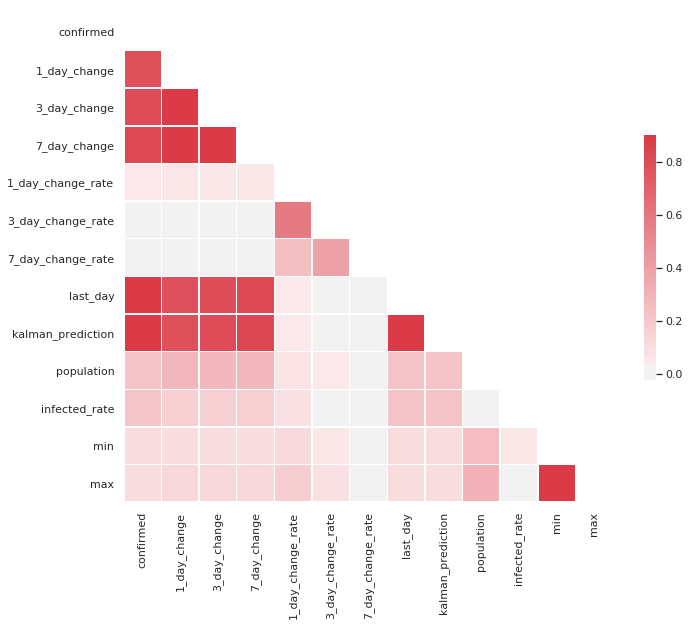

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.786151
3_day_change         0.803260
7_day_change         0.821386
1_day_change_rate    0.044174
3_day_change_rate    0.012140
7_day_change_rate   -0.007698
last_day             0.982091
kalman_prediction    0.982276
population           0.219588
infected_rate        0.217143
min                  0.109299
max                  0.112269
Name: confirmed, dtype: float64


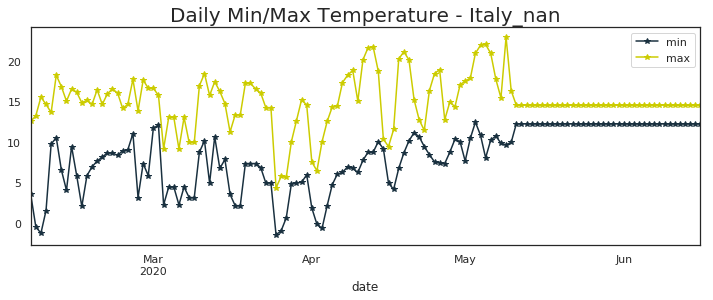

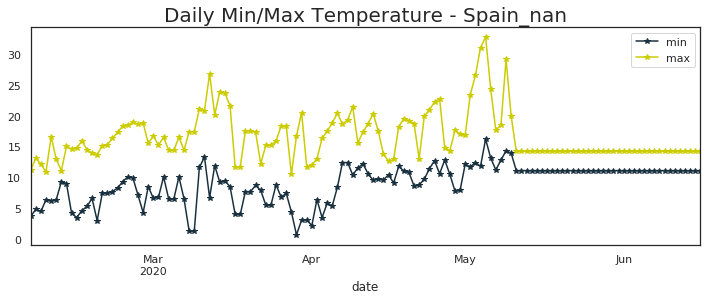

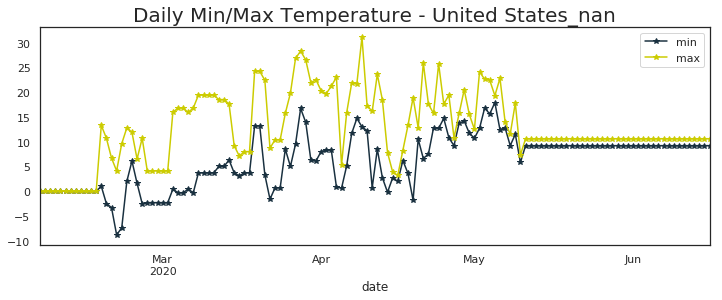

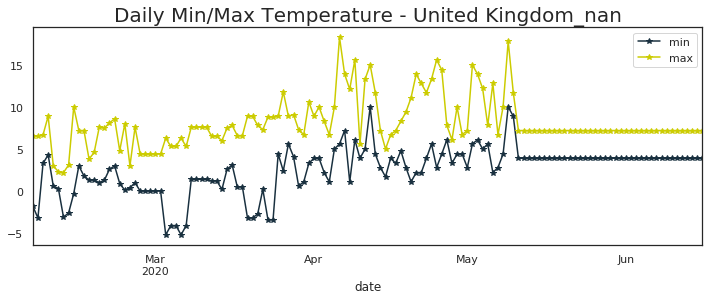

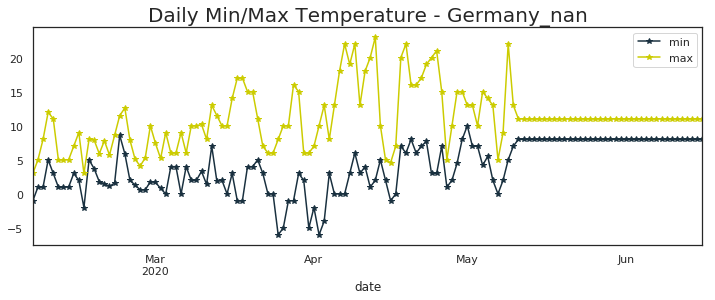

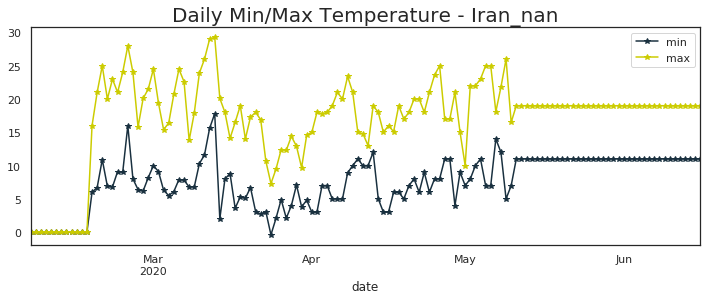

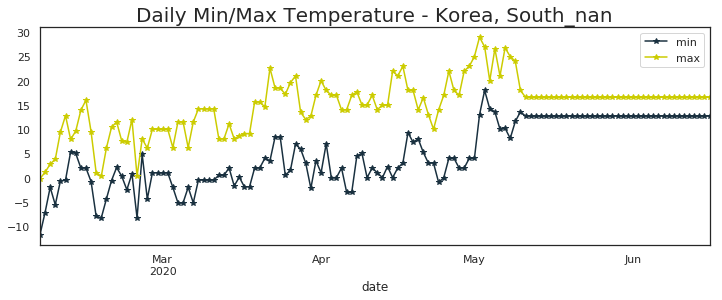

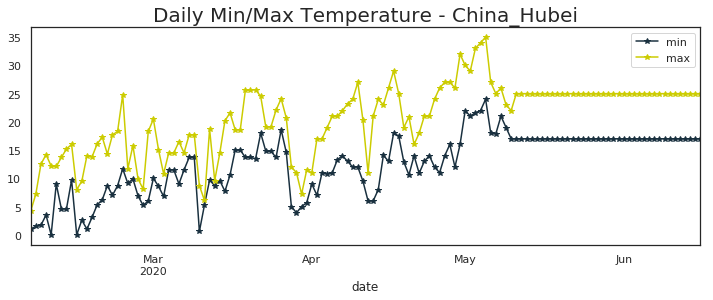

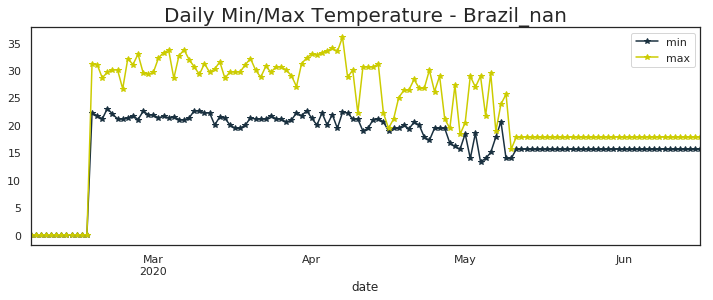

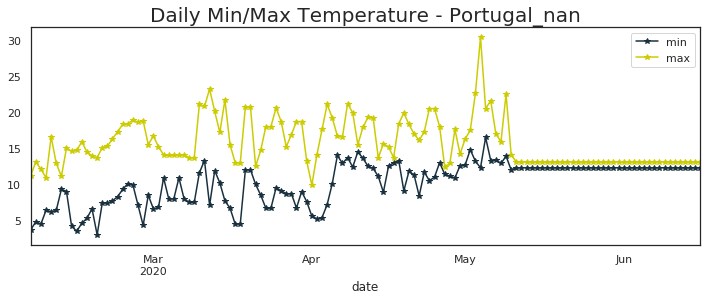

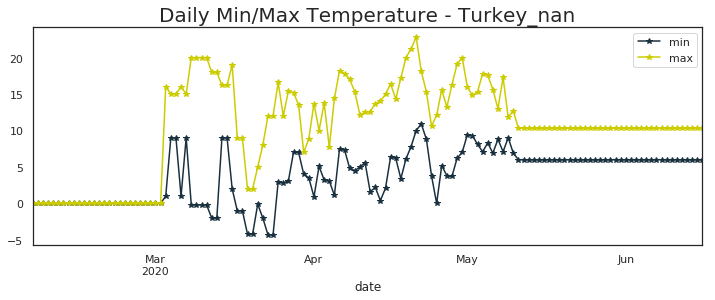

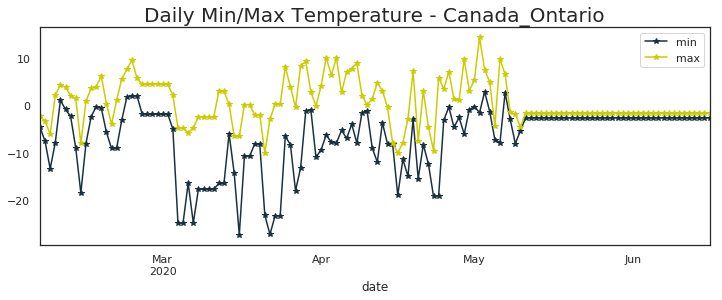

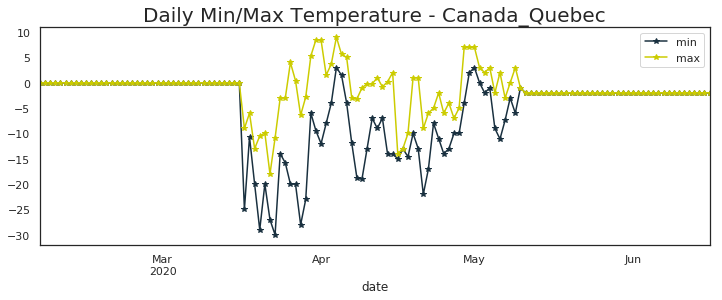

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                               min   max
region                                  
United States_nan             17.9  31.1
Brazil_nan                    23.0  36.0
Russia_nan                    13.0  30.0
India_nan                     30.0  43.0
United Kingdom_nan            10.0  18.3
Spain_nan                     16.2  32.7
Italy_nan                     12.4  22.9
Peru_nan                       0.0   0.0
Iran_nan                      17.8  29.3
France_nan                    14.2  23.8
Germany_nan                   10.0  23.0
Turkey_nan                    10.9  22.8
Chile_nan                      0.0   0.0
Mexico_nan                     0.0   0.0
Pakistan_nan                  16.0  28.0
Saudi Arabia_nan               0.0   0.0
Bangladesh_nan                 0.0   0.0
Qatar_nan                      0.0   0.0
South Africa_nan               0.0   0.0
China_Hubei                   24.0  35.0
Belgium_nan                   17.8  26.1
Belarus_nan          

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

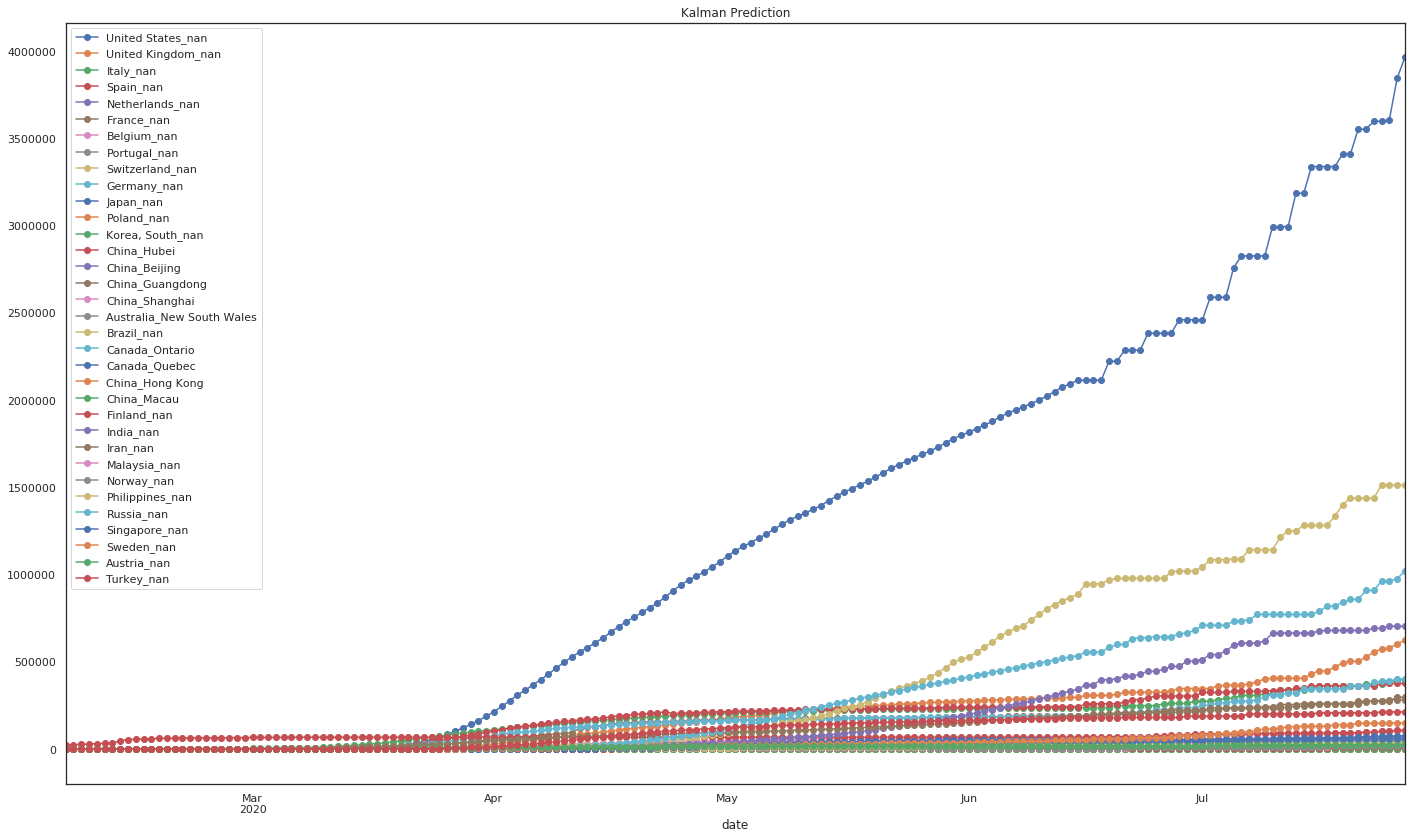

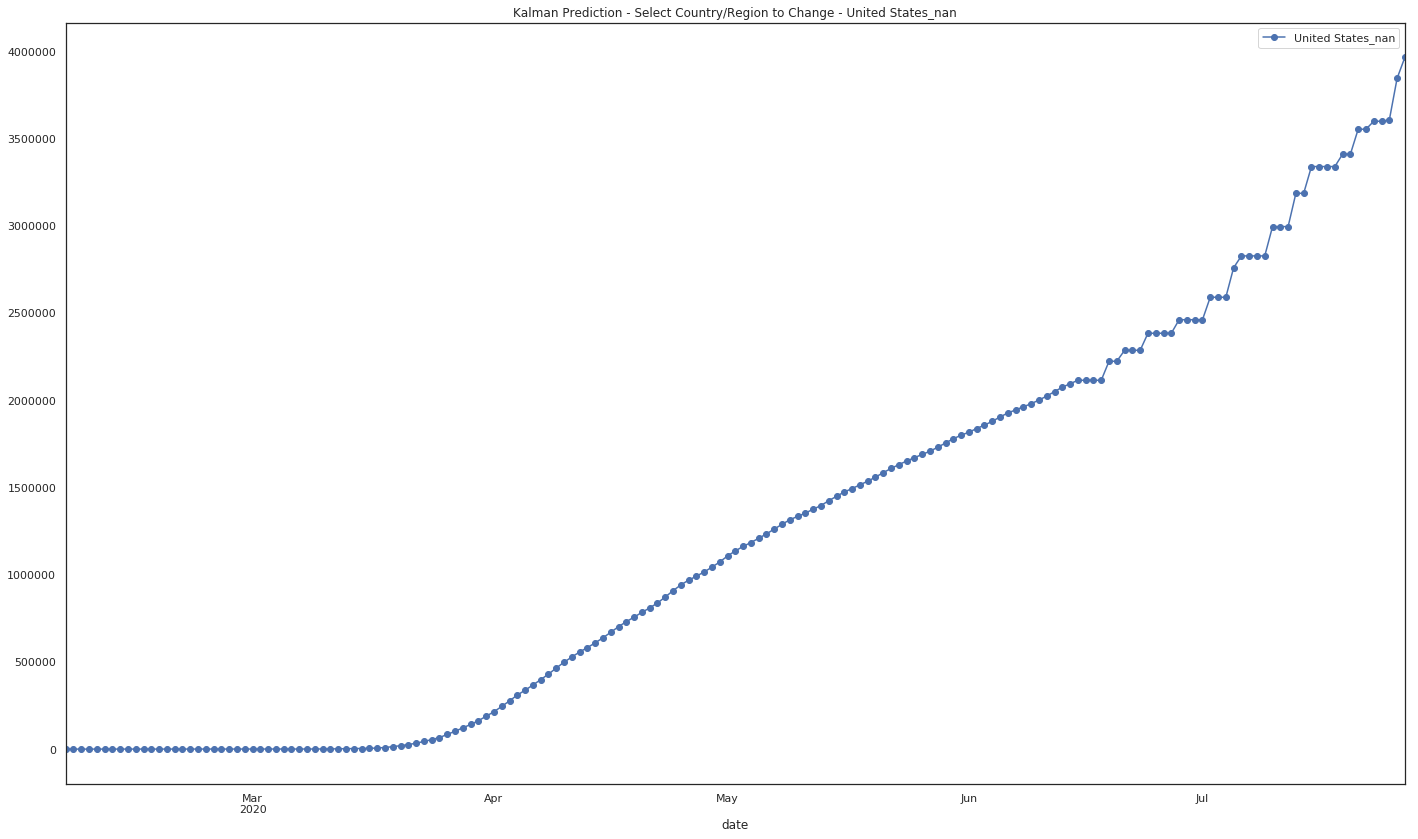

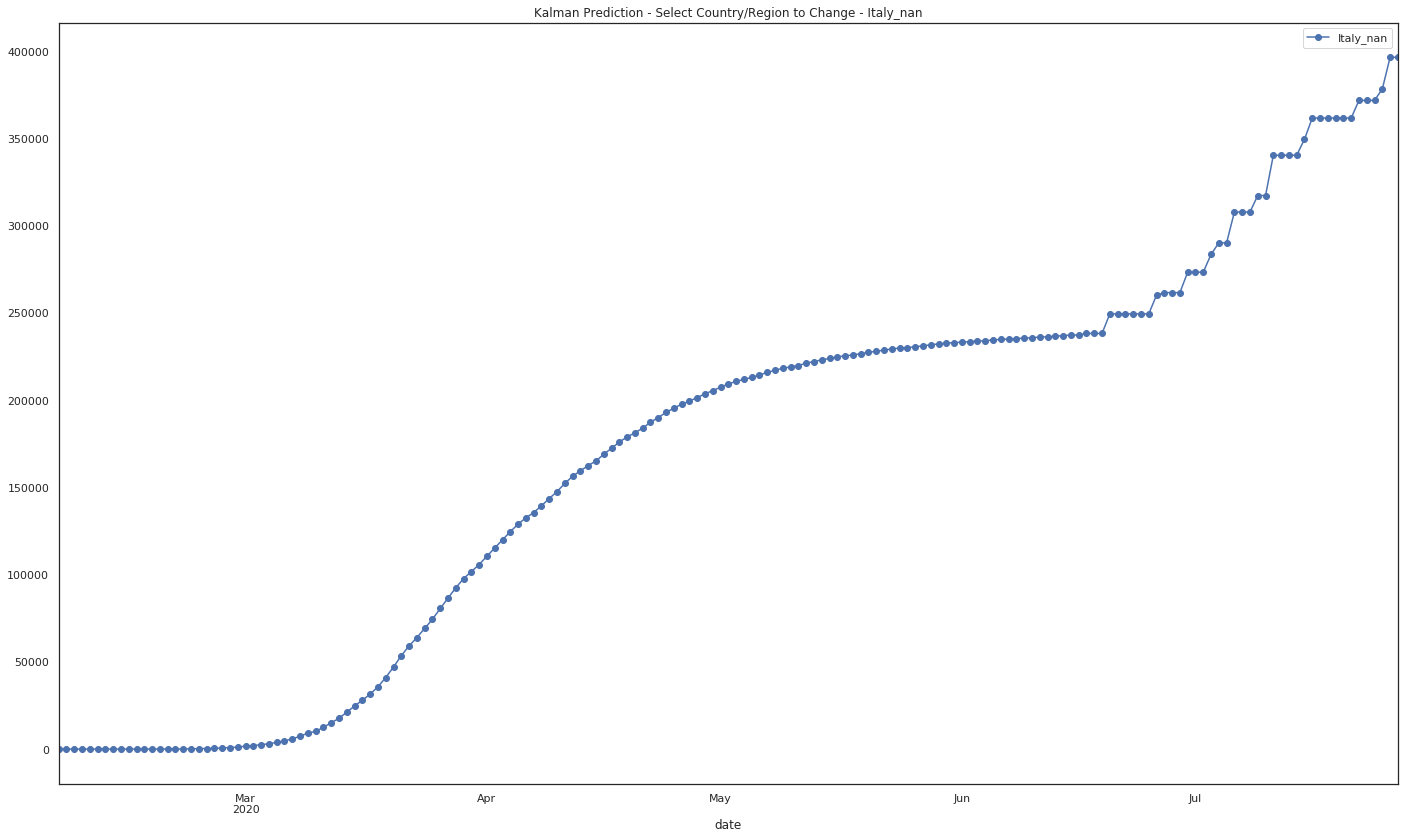

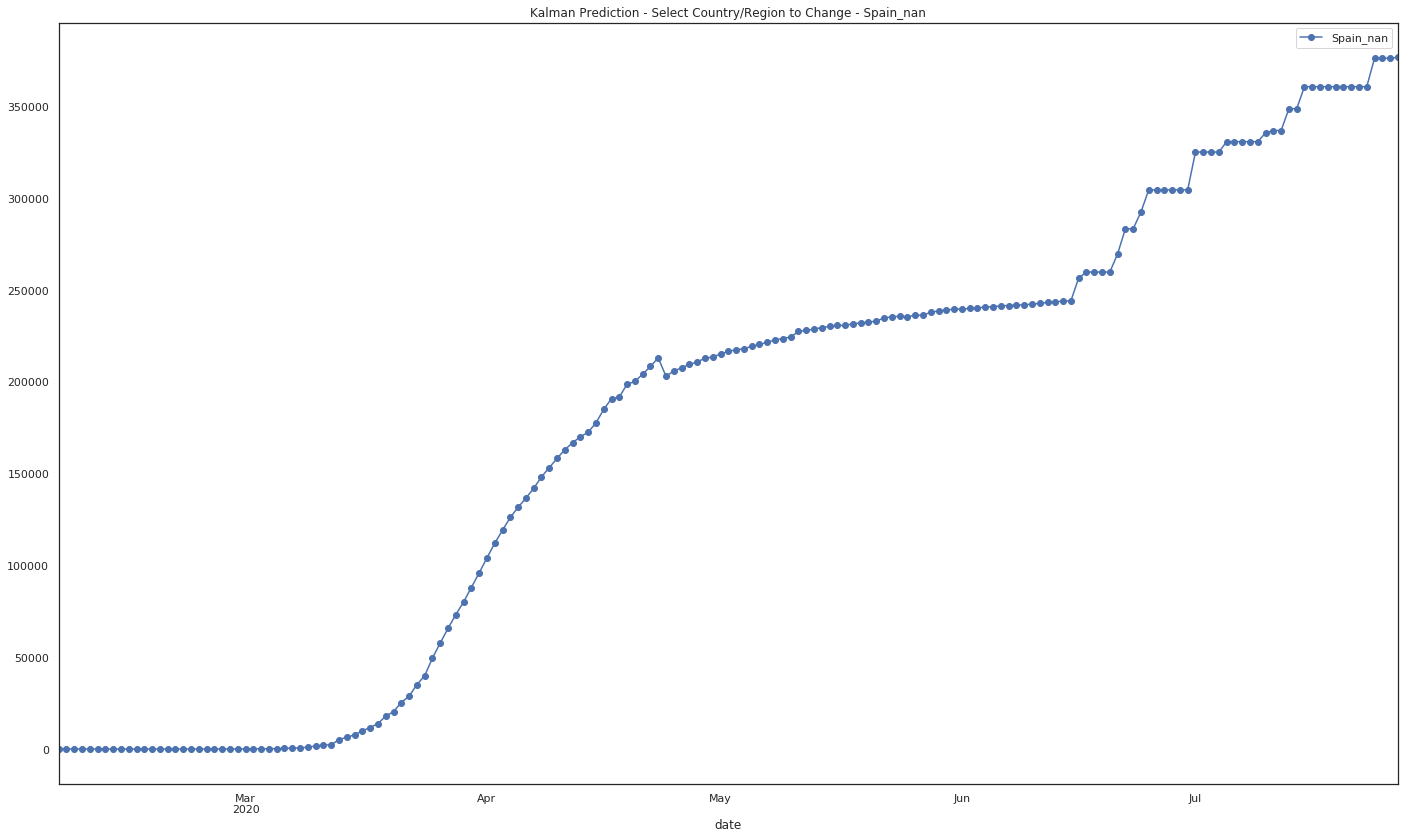

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


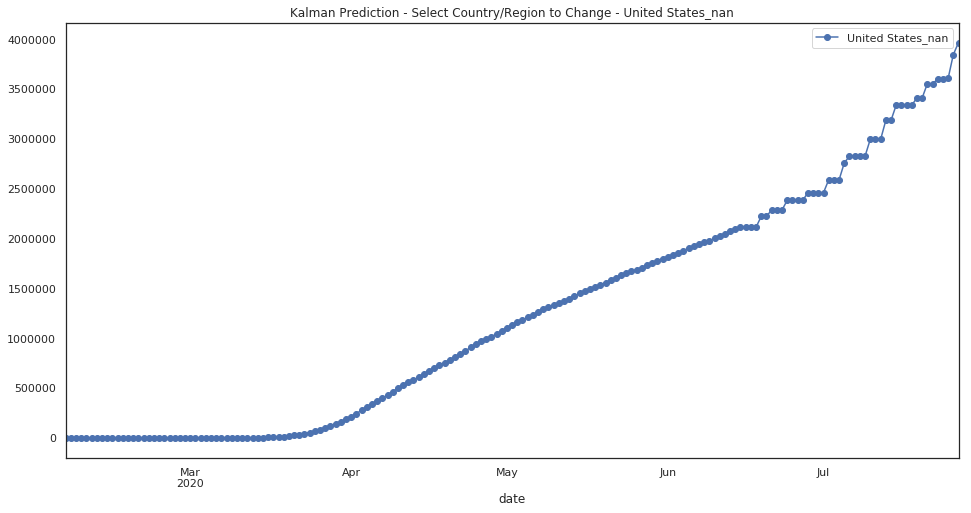

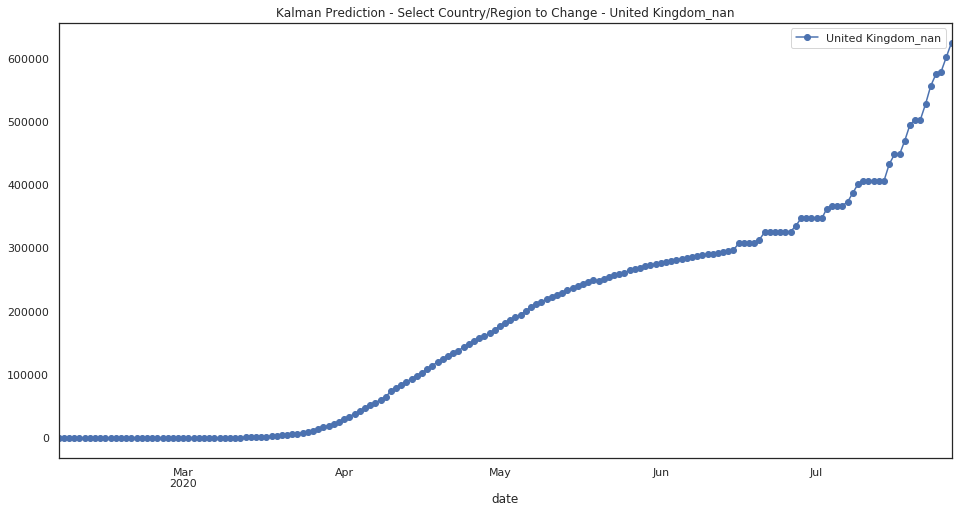

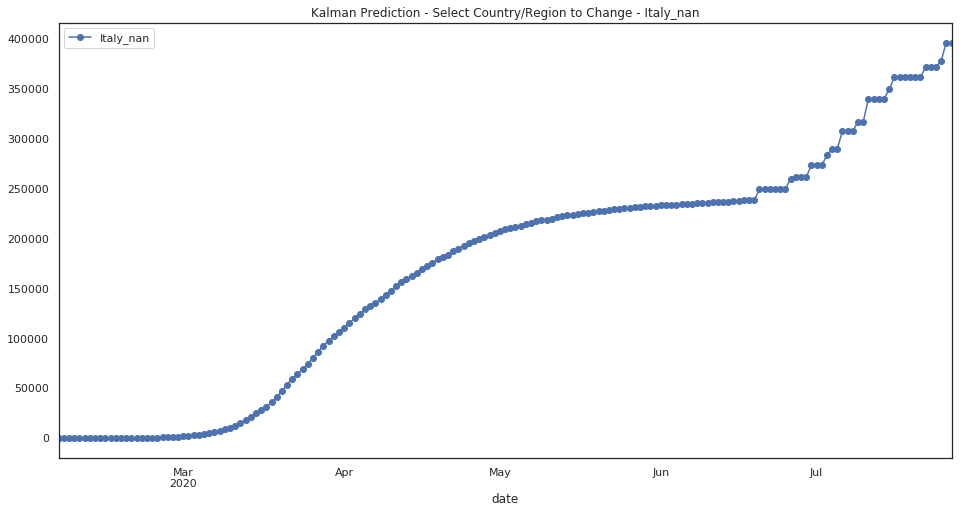

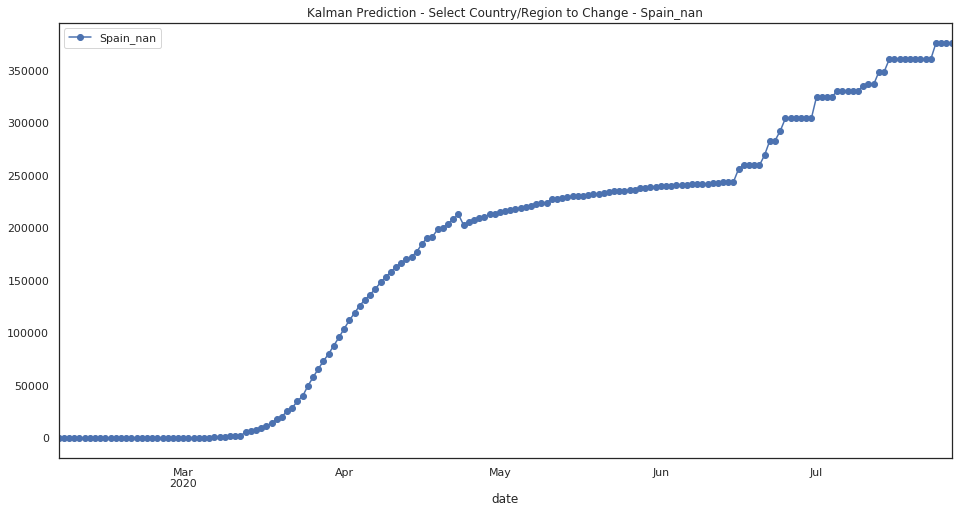

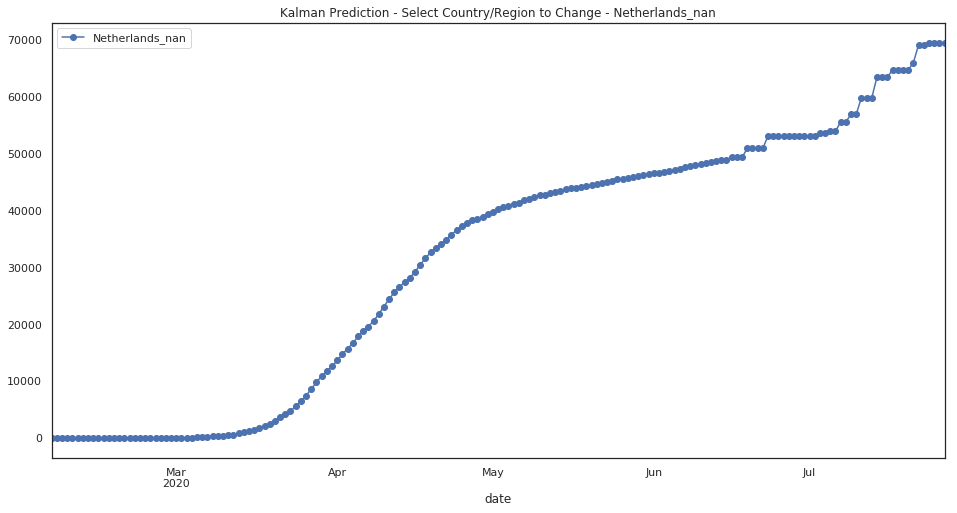

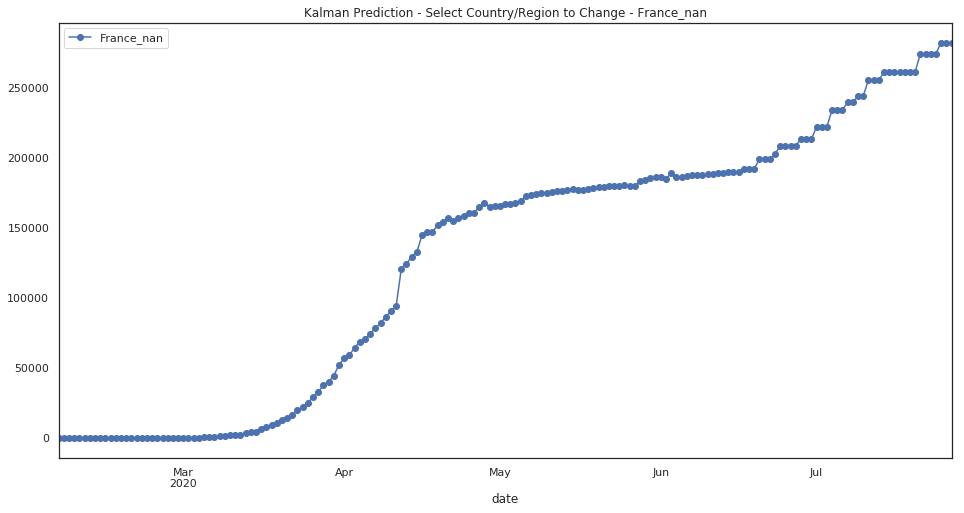

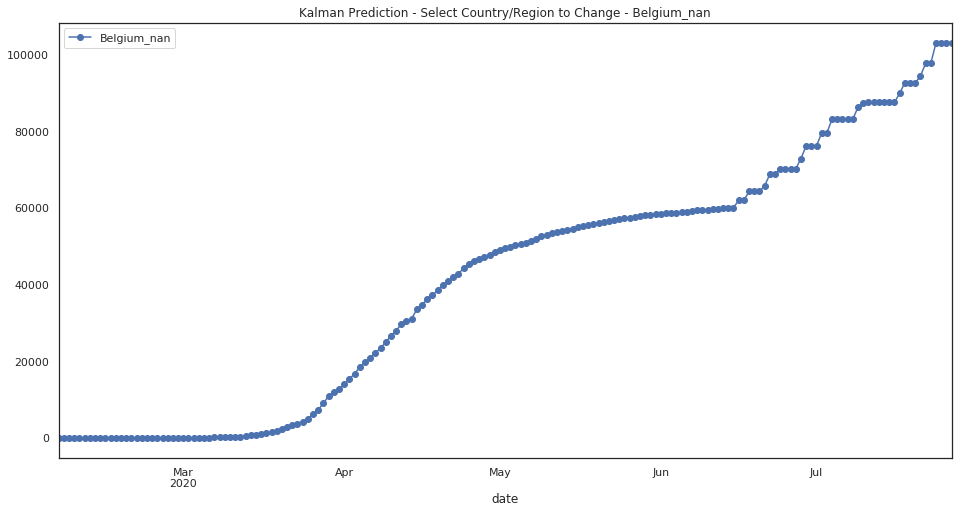

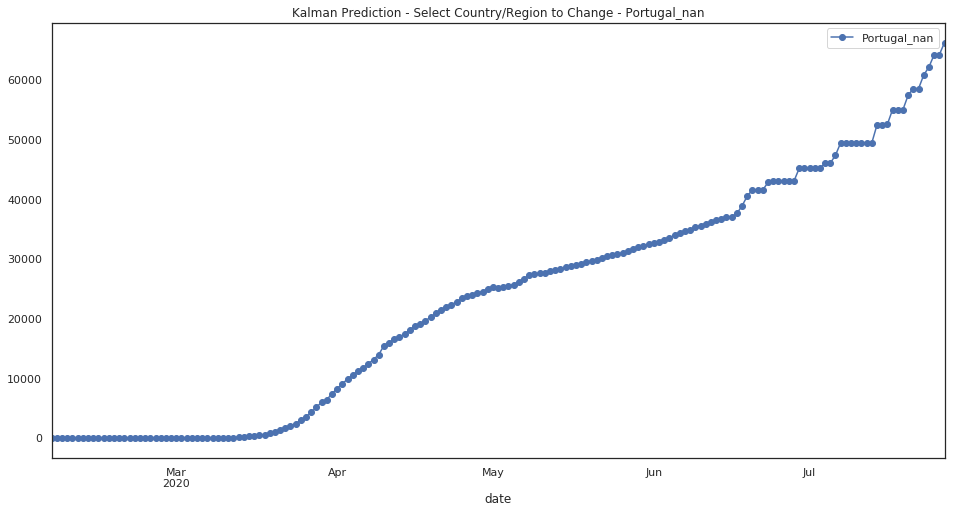

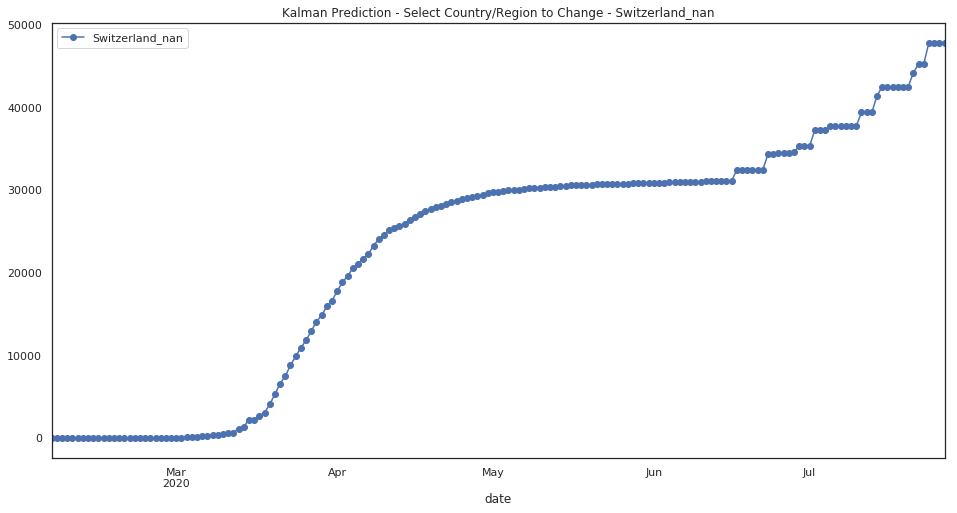

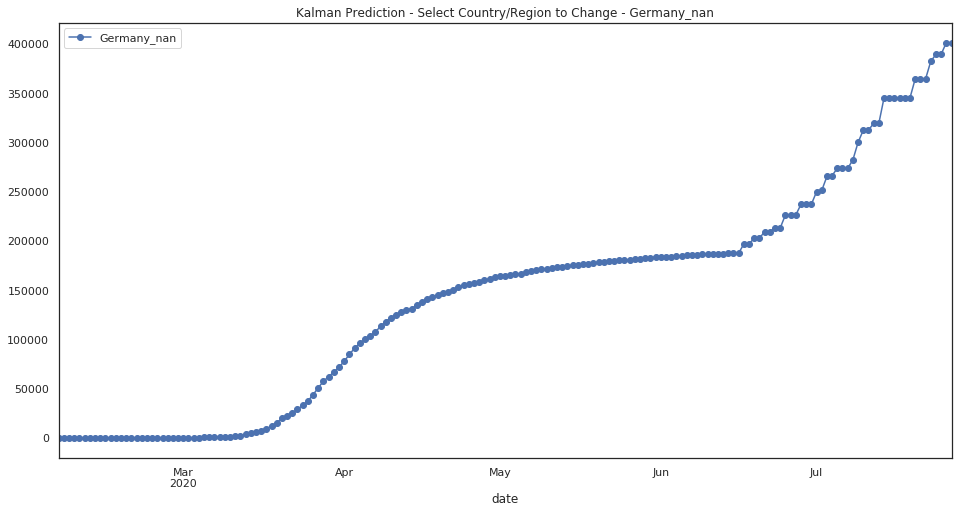

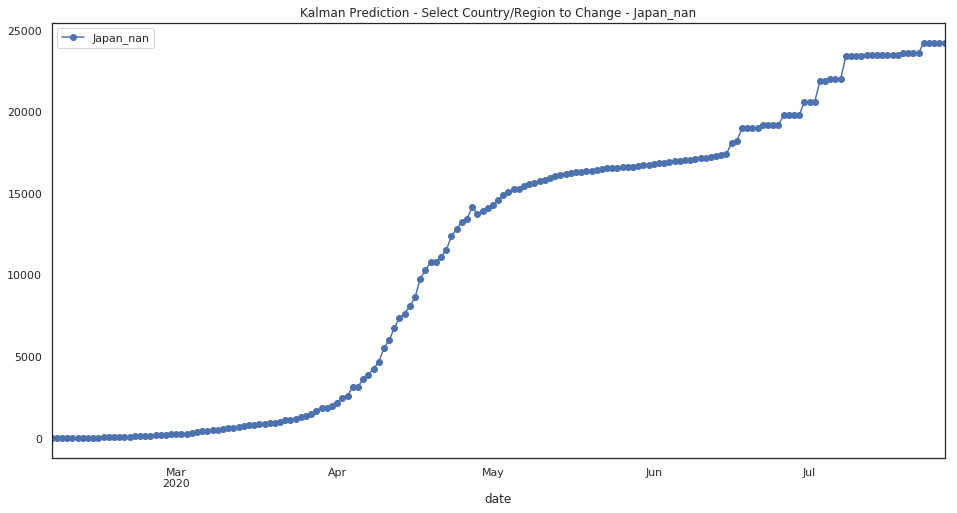

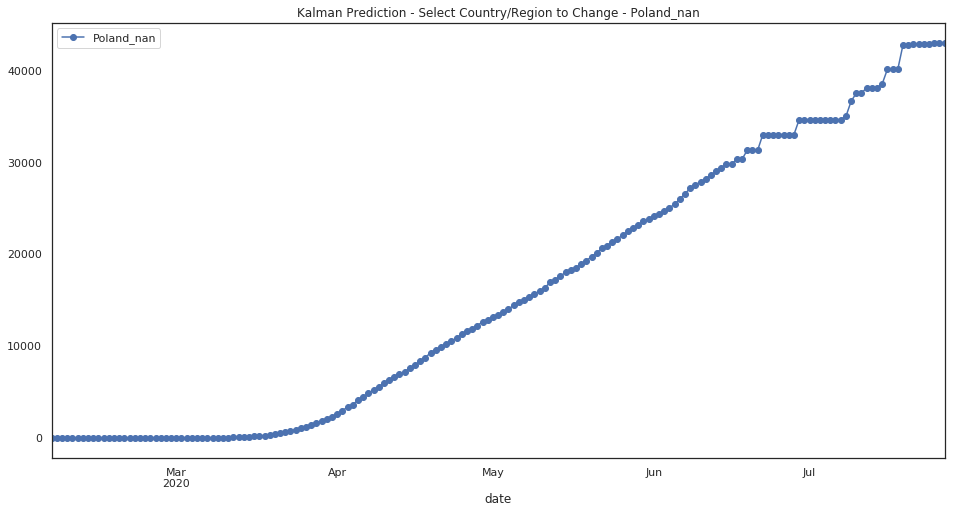

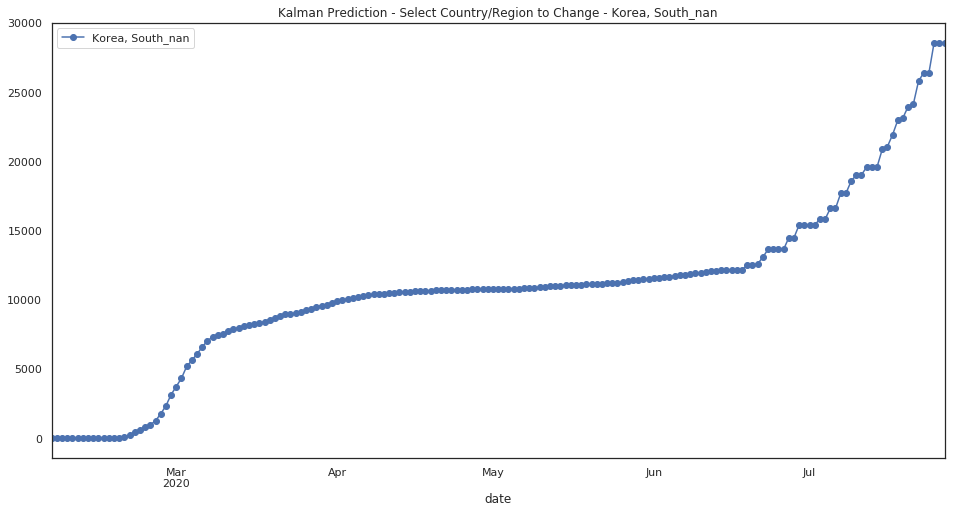

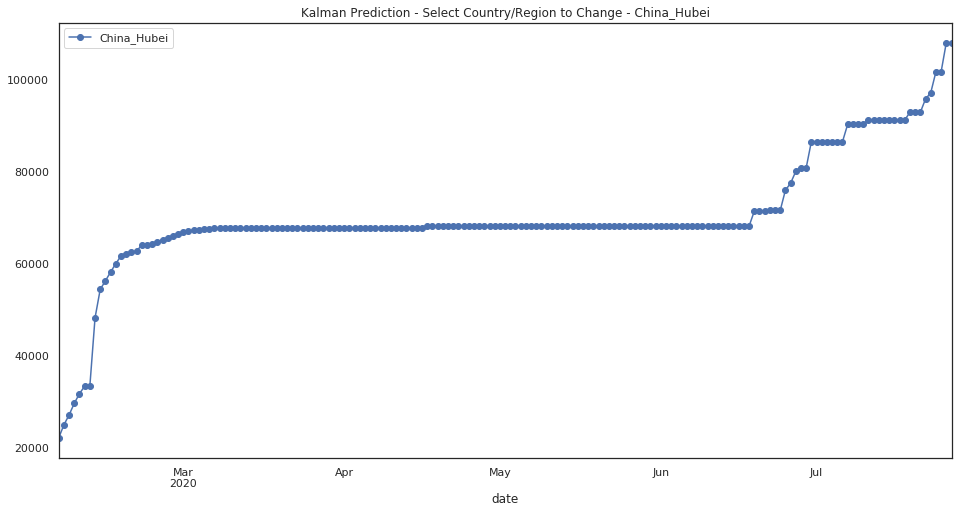

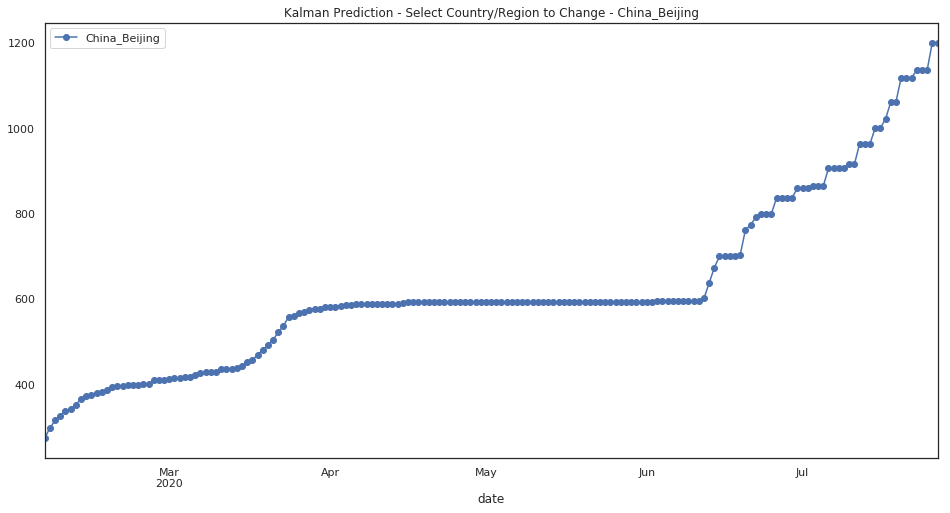

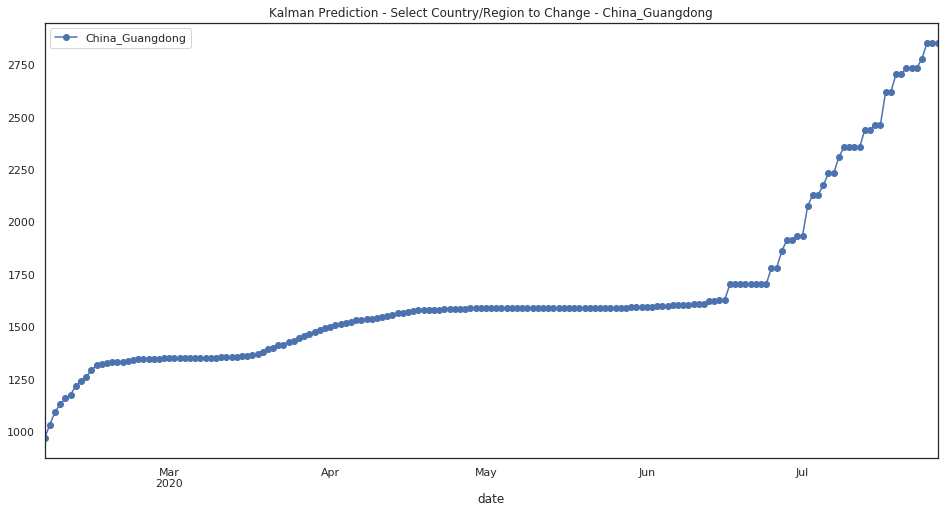

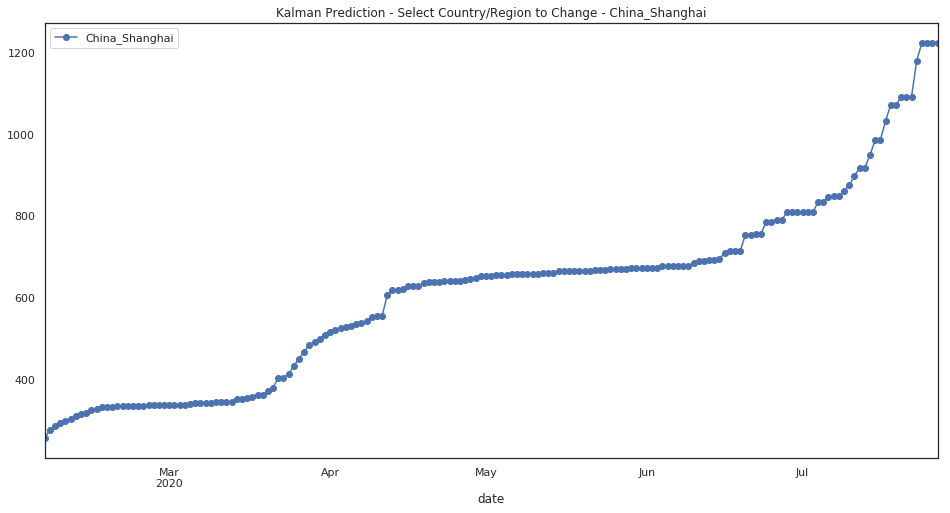

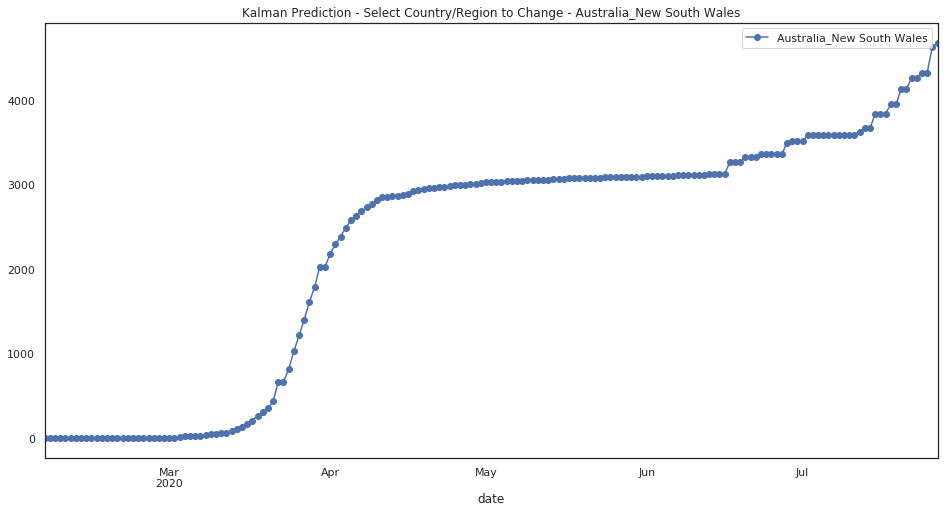

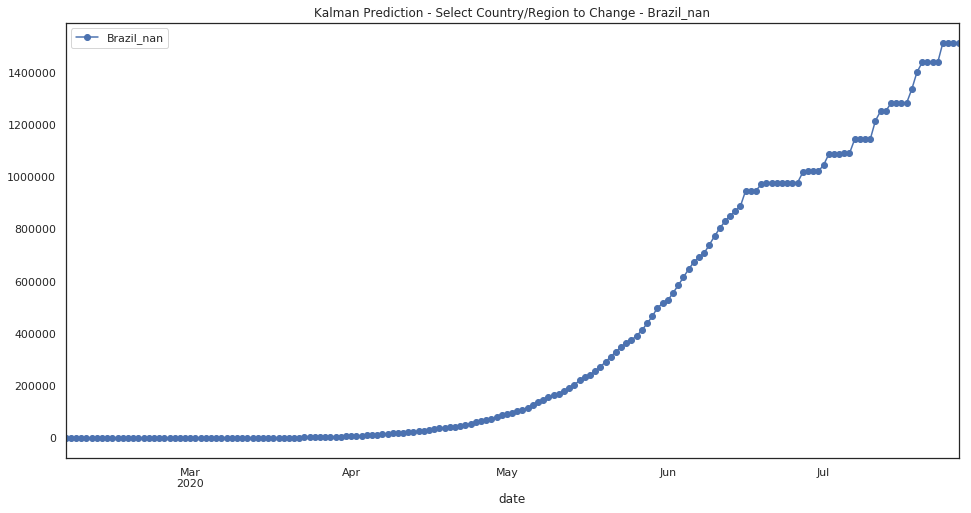

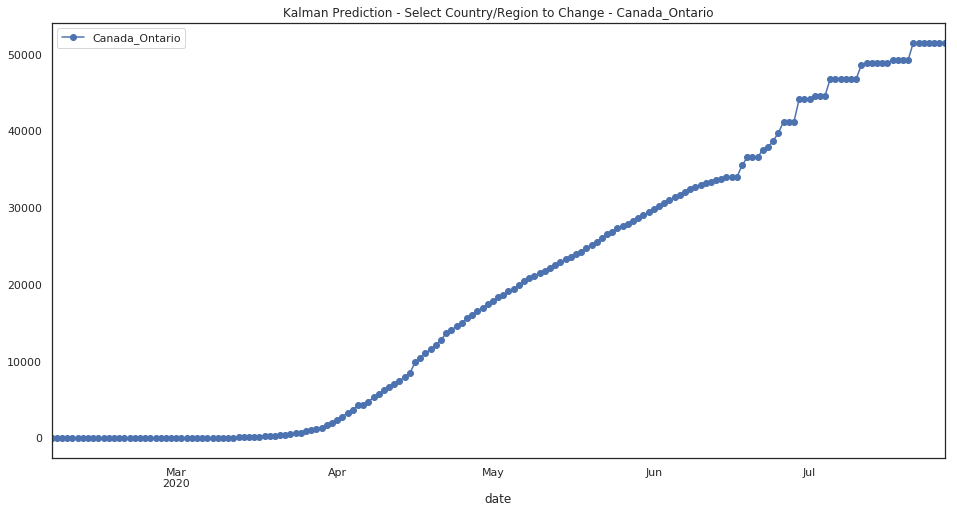

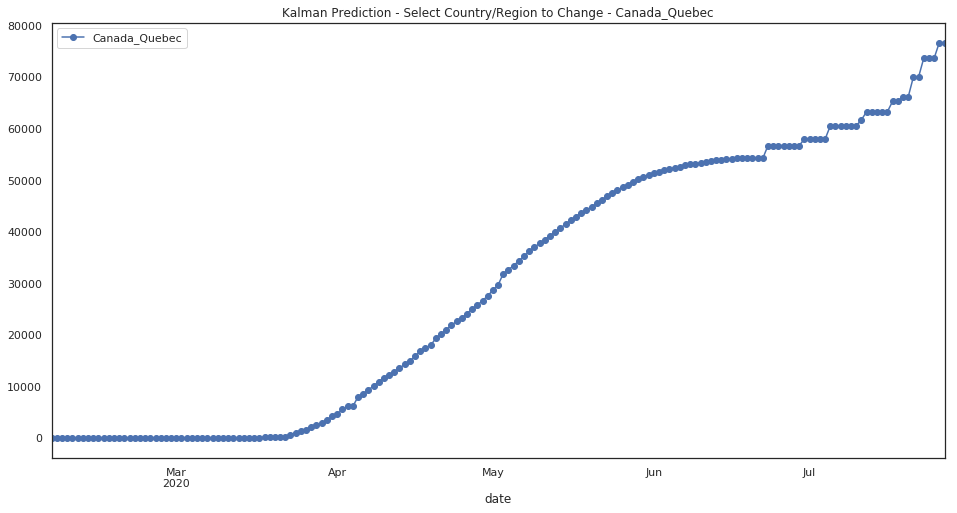

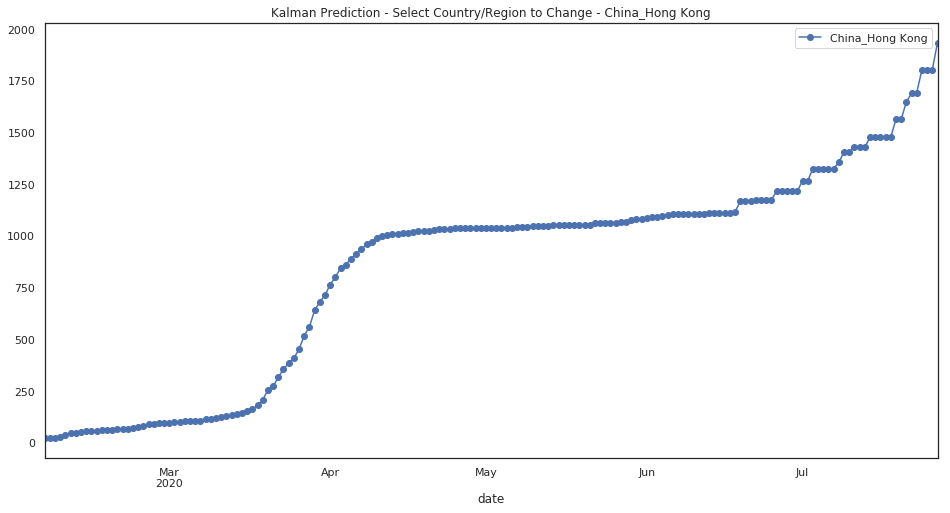

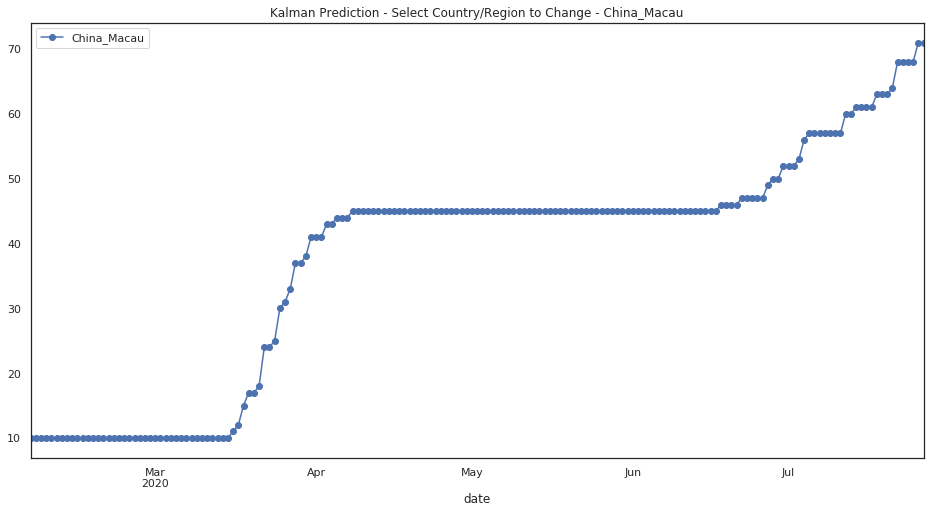

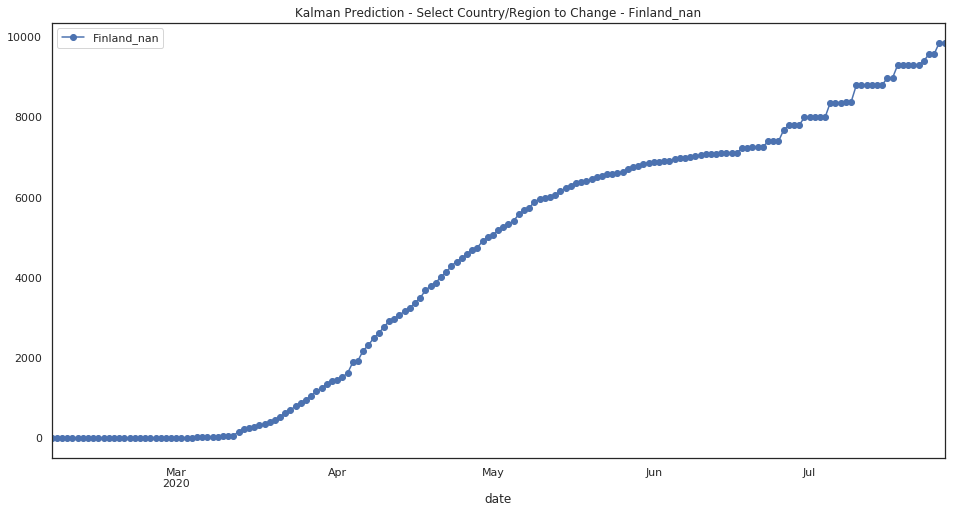

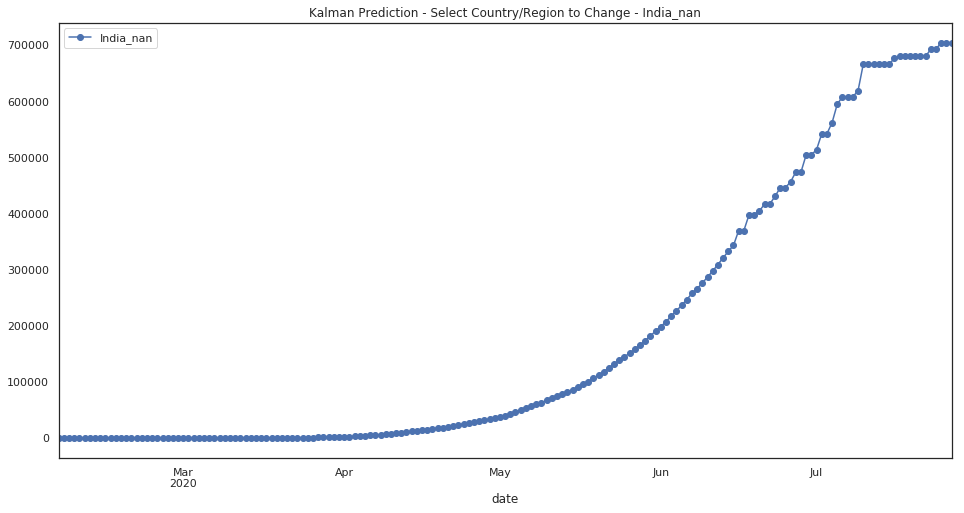

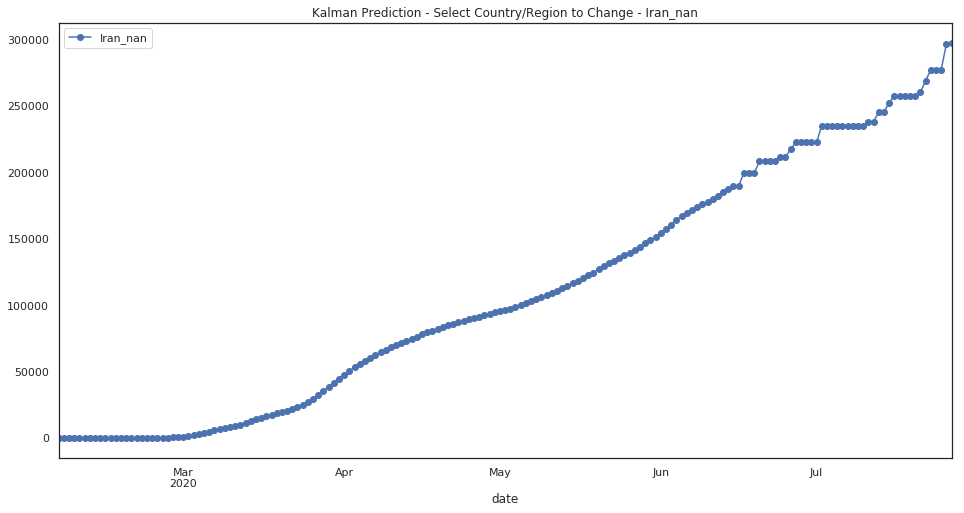

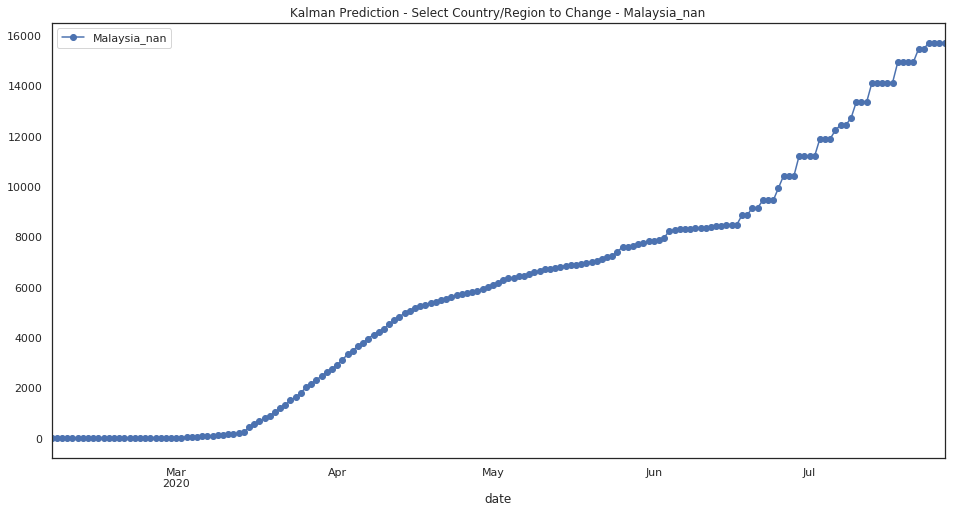

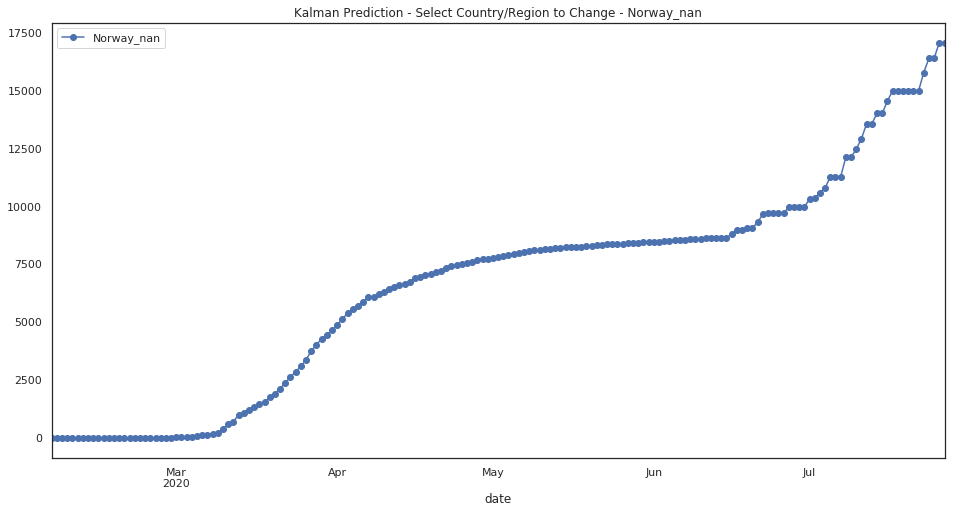

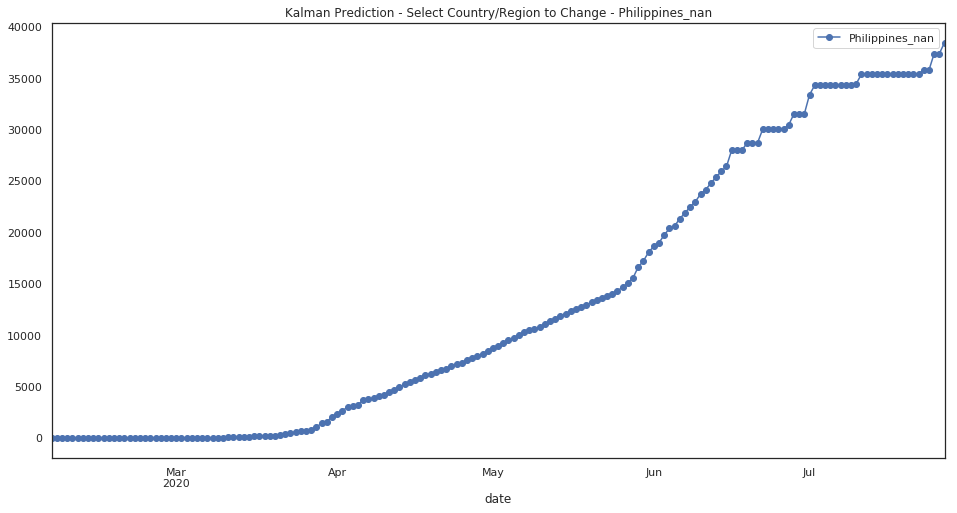

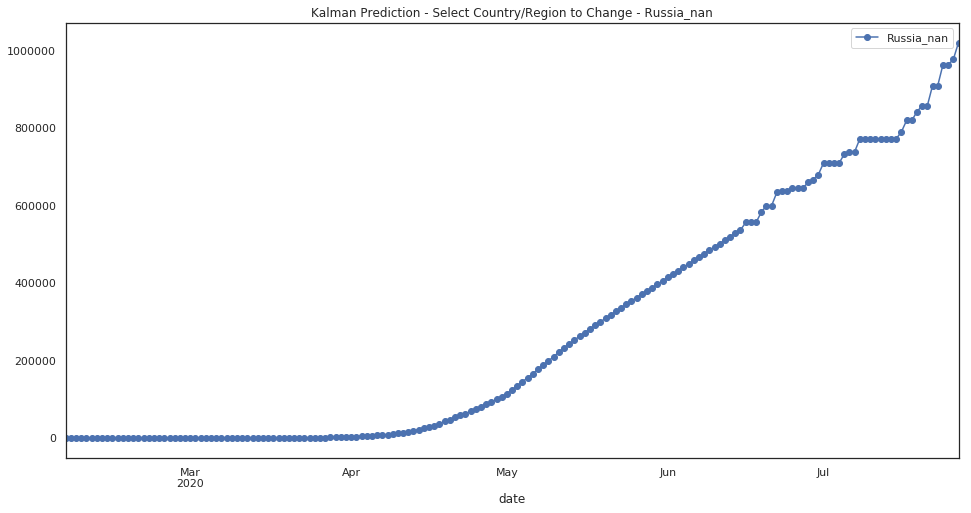

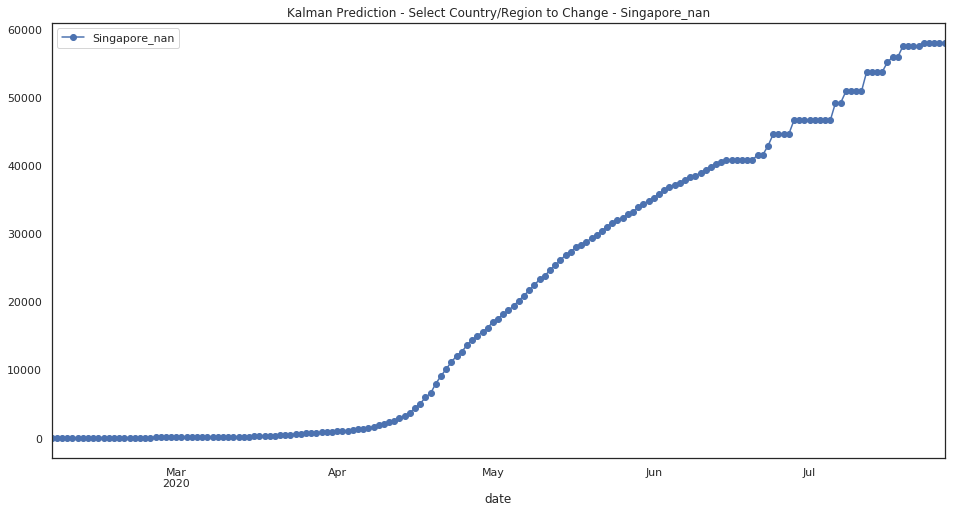

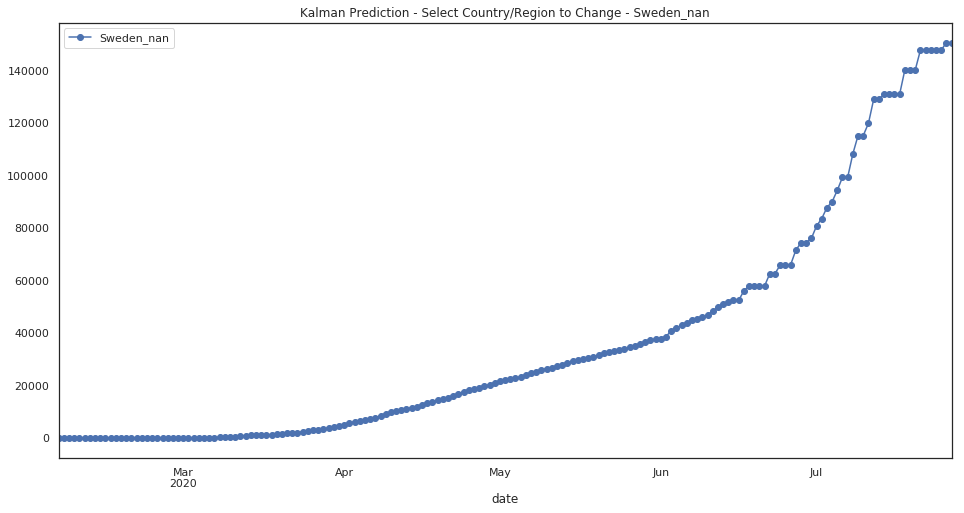

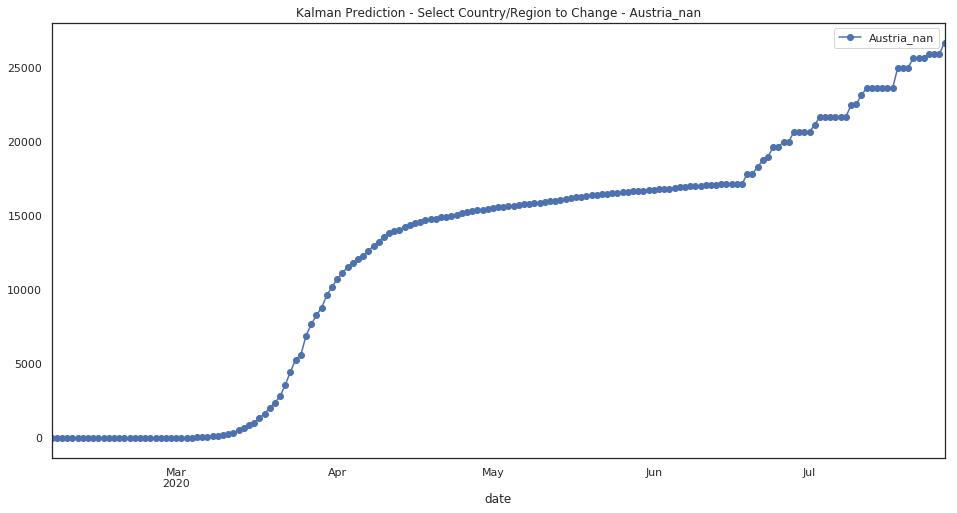

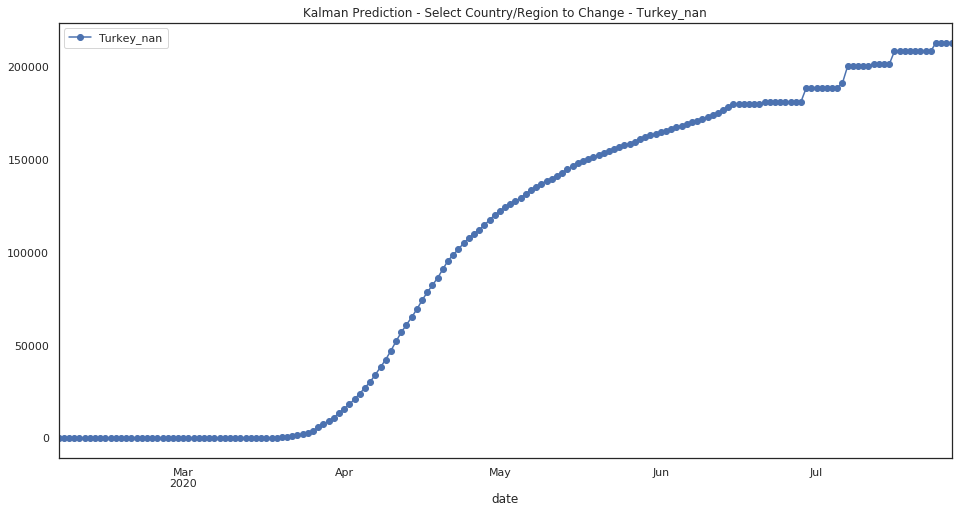

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-07-27 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       3965481.0
Brazil_nan                                    NaN       1513635.0
Russia_nan                                    NaN       1020495.0
India_nan                                     NaN        704454.0
United Kingdom_nan                            NaN        624754.0
Germany_nan                                   NaN        401541.0
Italy_nan                                     NaN        396521.0
Peru_nan                                      NaN        376984.0
Spain_nan                                     NaN        376737.0
Chile_nan                                     NaN        324804.0
Iran_nan                                      NaN        297812.0
Pakistan_nan                                  NaN        287456.0
France_nan                                    NaN        282100.0
Mexico_nan                                    NaN        253764.0
Saudi Arabia_nan                              NaN        235609.0
South Africa_nan                              NaN        215108.0
Turkey_nan                                    NaN        213179.0
Bangladesh_nan                                NaN        211916.0
Sweden_nan                                    NaN        150482.0
Qatar_nan                                     NaN        116720.0
Colombia_nan                                  NaN        116035.0
China_Hubei                                   NaN        108038.0
Belgium_nan                                   NaN        103157.0
Belarus_nan                                   NaN         91363.0
Indonesia_nan                                 NaN         80672.0
Canada_Quebec                                 NaN         76673.0
Egypt_nan                                     NaN         72168.0
Netherlands_nan                               NaN         69507.0
Argentina_nan                                 NaN         69016.0
Ukraine_nan                                   NaN         68456.0
...                                           ...             ...
Belize_nan                                    NaN            37.0
Timor-Leste_nan                               NaN            37.0
Netherlands_Curacao                           NaN            36.0
China_Qinghai                                 NaN            31.0
Grenada_nan                                   NaN            31.0
Seychelles_nan                                NaN            29.0
Fiji_nan                                      NaN            27.0
Laos_nan                                      NaN            26.0
Saint Lucia_nan                               NaN            25.0
Canada_Grand Princess                         NaN            25.0
Dominica_nan                                  NaN            24.0
Holy See_nan                                  NaN            22.0
Saint Kitts and Nevis_nan                     NaN            21.0
United Kingdom_Falkland Islands (Malvinas)    NaN            21.0
Denmark_Greenland                             NaN            20.0
United Kingdom_Turks and Caicos Islands       NaN            15.0
United Kingdom_Montserrat                     NaN            12.0
Canada_Yukon                                  NaN            11.0
Western Sahara_nan                            NaN             9.0
MS Zaandam_nan                                NaN             9.0
Papua New Guinea_nan                          NaN             8.0
United Kingdom_British Virgin Islands         NaN             8.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             7.0
France_Saint Barthelemy                       NaN             6.0
Canada_Northwest Territories                  NaN             5.0
Lesotho_nan                                   NaN             4.0
United Kingdom_Anguilla                       NaN             3.0
China_Tibet                                   NaN             1.0
France_Saint Pierre and Miquelon              NaN             1.0
Canada_Diamond Princes

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-06              6.0          6.0          6.0          6.0   
2020-02-07              6.0          6.0          6.0          6.0   
2020-02-08              6.0          6.0          6.0          6.0   
2020-02-09              6.0          6.0          6.0          6.0   
2020-02-10              6.0          6.0          6.0          6.0   
2020-02-11              6.0          6.0          6.0          6.0   
2020-02-12              6.0          6.0          6.0          6.0   
2020-02-13              6.0          6.0          6.0          6.0   
2020-02-14              6.0          6.0          6.0          6.0   
2020-02-15              6.0          6.0          6.0          6.0   
2020-02-16              6.0          6.0          6.0          6.0   
2020-02-17              6.0          6.0          6.0          6.0   
2020-02-18             41.0          6.0         38.0          6.0   
2020-02-19             21.0          6.0         40.0          6.0   
2020-02-20             35.0          6.0         38.0          6.0   
2020-02-21             43.0          6.0         43.0          6.0   
2020-02-22             34.0          6.0         41.0          6.0   
2020-02-23             32.0          6.0         36.0          6.0   
2020-02-24             37.0          6.0         48.0          6.0   
2020-02-25             40.0          6.0         37.0          6.0   
2020-02-26             16.0          6.0         42.0          6.0   
2020-02-27             39.0          6.0         47.0          6.0   
2020-02-28             21.0          6.0         31.0          6.0   
2020-02-29             23.0          6.0         37.0          6.0   
2020-03-01             25.0          6.0         34.0          6.0   
2020-03-02             26.0          6.0         34.0          7.0   
2020-03-03             27.0          6.0         30.0          8.0   
2020-03-04             22.0          6.0         58.0          1.0   
2020-03-05             22.0          6.0        101.0          1.0   
2020-03-06             24.0          6.0         79.0          5.0   
...                     ...          ...          ...          ...   
2020-06-29          35642.0       2048.0      14995.0       1059.0   
2020-06-30          36683.0       2133.0      14992.0       1059.0   
2020-07-01          40451.0       2210.0      15546.0       1076.0   
2020-07-02          40466.0       2146.0      17091.0       1150.0   
2020-07-03          42896.0       2146.0      16136.0       1126.0   
2020-07-04          42335.0       2181.0      16569.0       1126.0   
2020-07-05          46777.0       2276.0      18049.0       1126.0   
2020-07-06          47234.0       2218.0      17201.0       1126.0   
2020-07-07          46434.0       2238.0      17202.0       1126.0   
2020-07-08          48921.0       2311.0      17296.0       1126.0   
2020-07-09          47689.0       2270.0      17604.0       1144.0   
2020-07-10          48826.0       2270.0      18700.0       1224.0   
2020-07-11          52765.0       2274.0      18292.0       1187.0   
2020-07-12          50709.0       2319.0      18378.0       1201.0   
2020-07-13          50851.0       2465.0      19189.0       1214.0   
2020-07-14          50933.0       2380.0      18750.0       1284.0   
2020-07-15          50927.0       2383.0      19059.0       1254.0   
2020-07-16          51946.0       2388.0      20235.0       1277.0   
2020-07-17          55149.0       2388.0      20060.0       1274.0   
2020-07-18          53280.0       2388.0      19790.0       1274.0   
2020-07-19          54109.0       2388.0      19858.0       1323.0   
2020-07-20          57379.0       2387.0      19940.0       1353.0   
2020-07-21          55598.0       2387.0      20455.0       1336.0   
2020-07-22          56186.0       2387.0      21402.0       1348.0   
2020-07-23

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
#pred=pred[:-1]

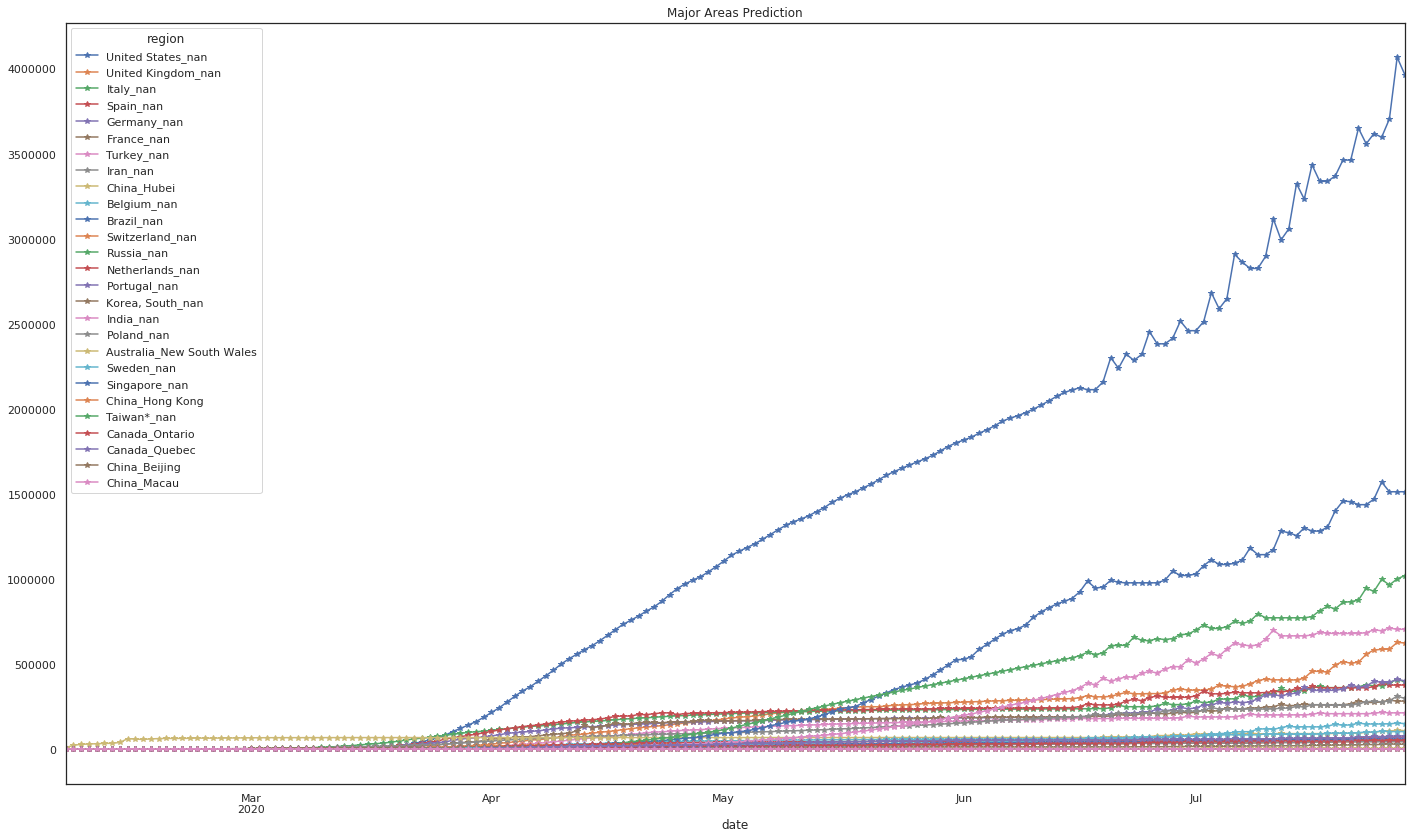

In [74]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Beijing',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

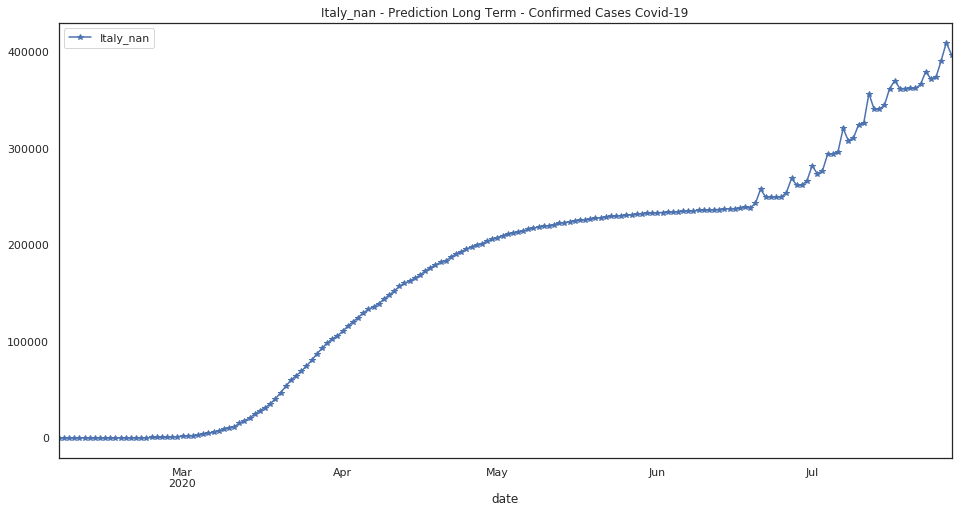

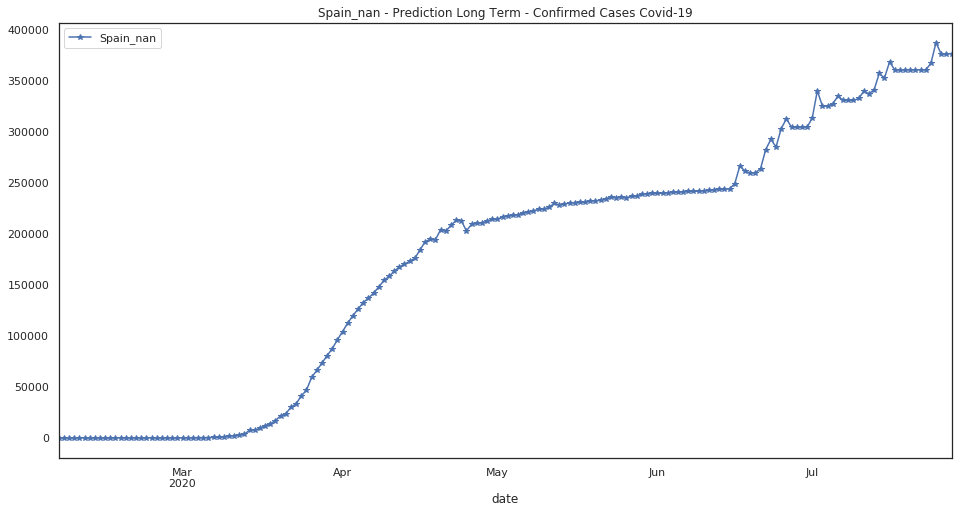

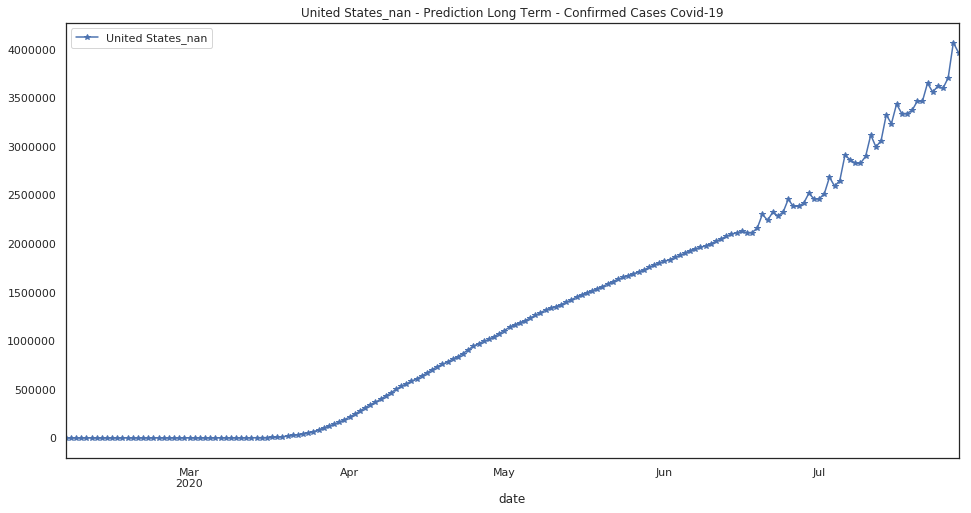

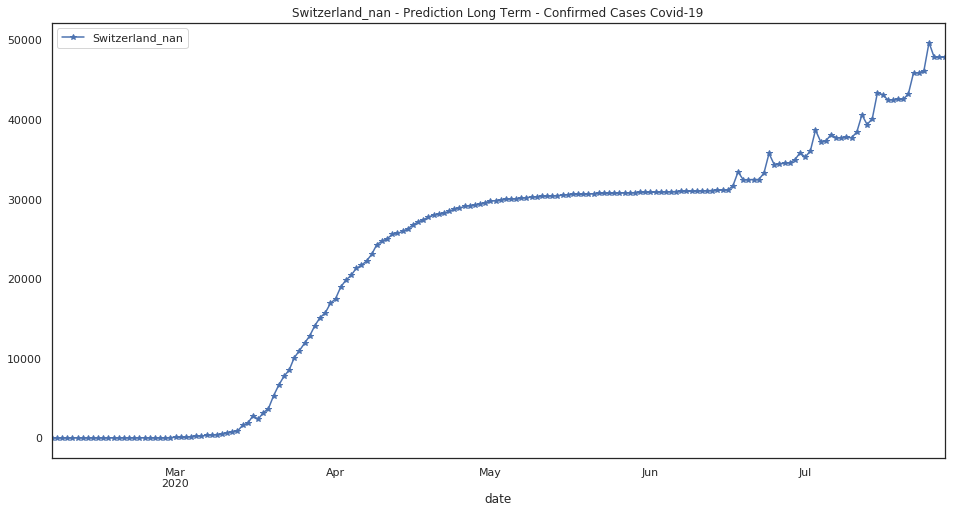

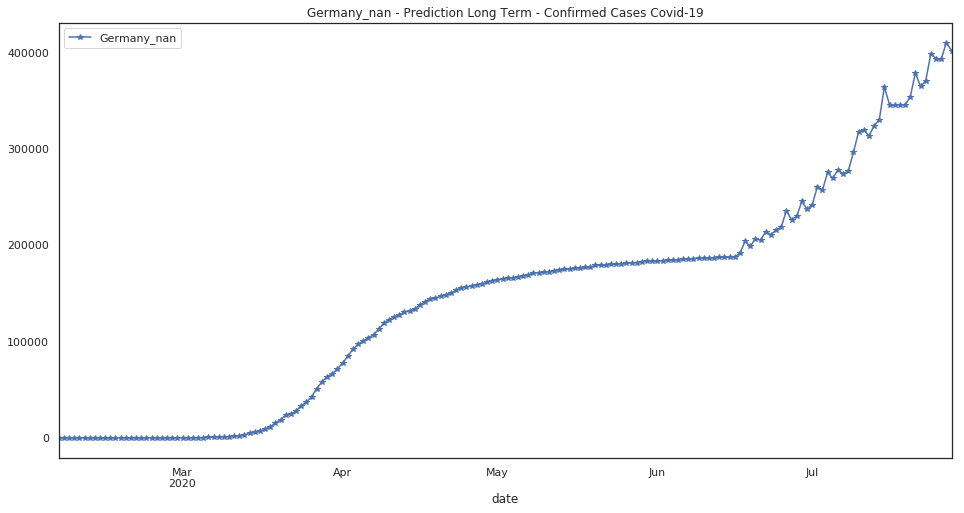

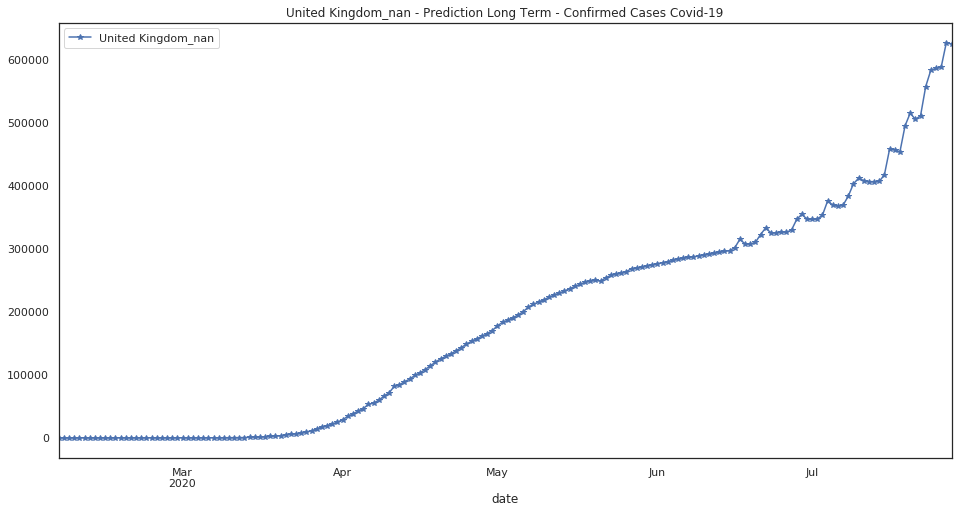

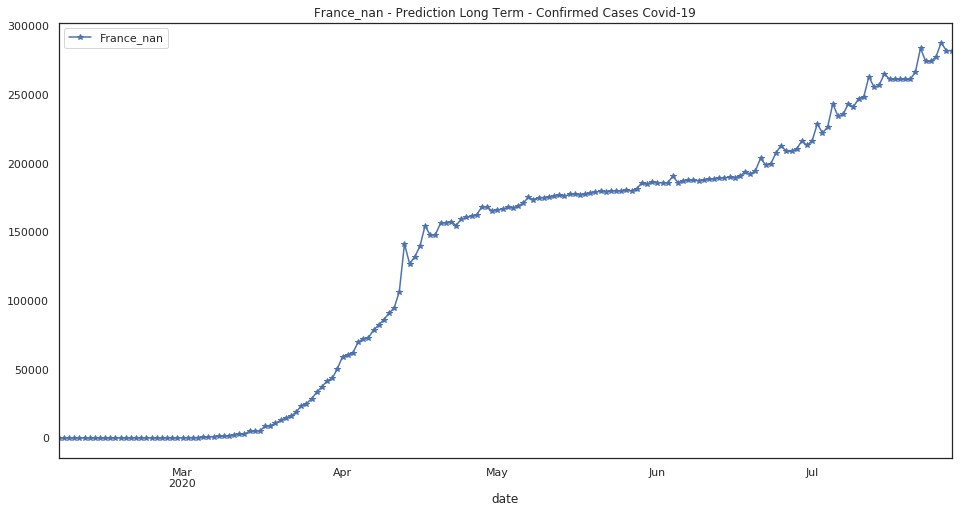

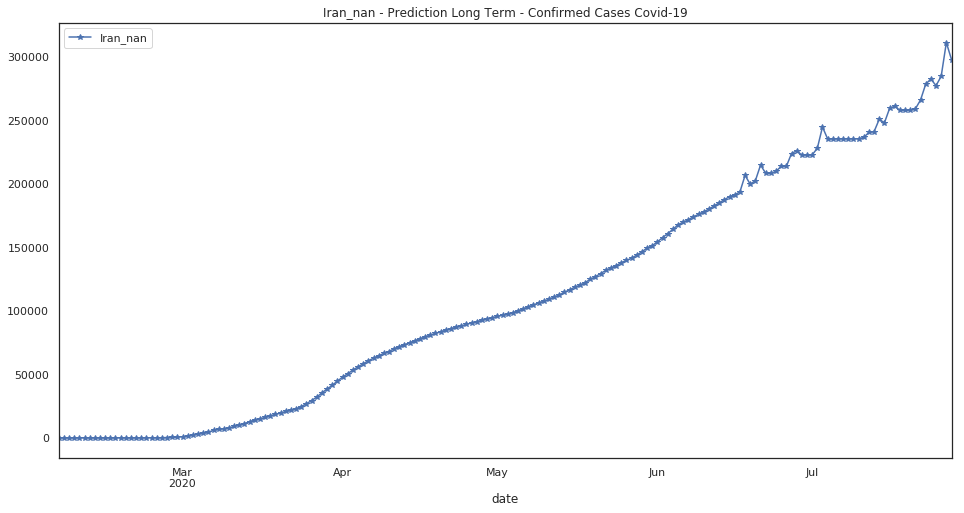

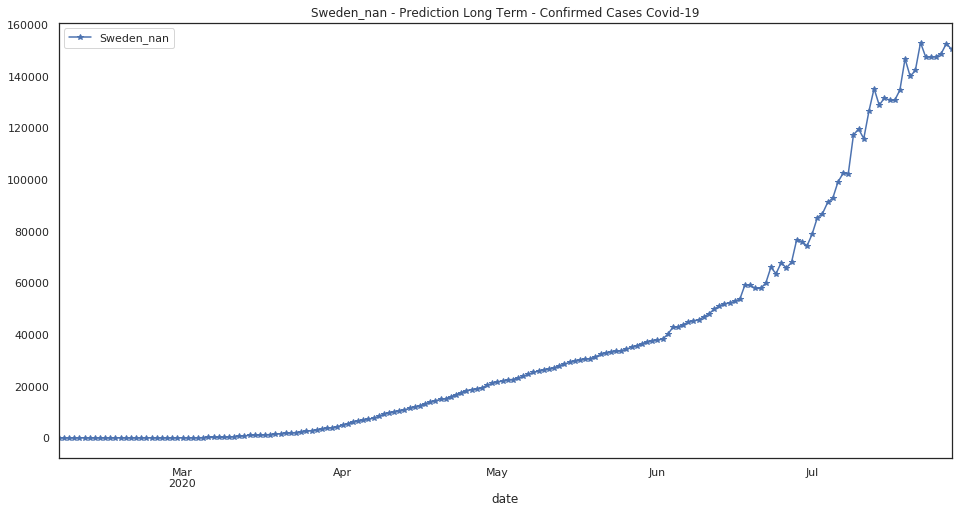

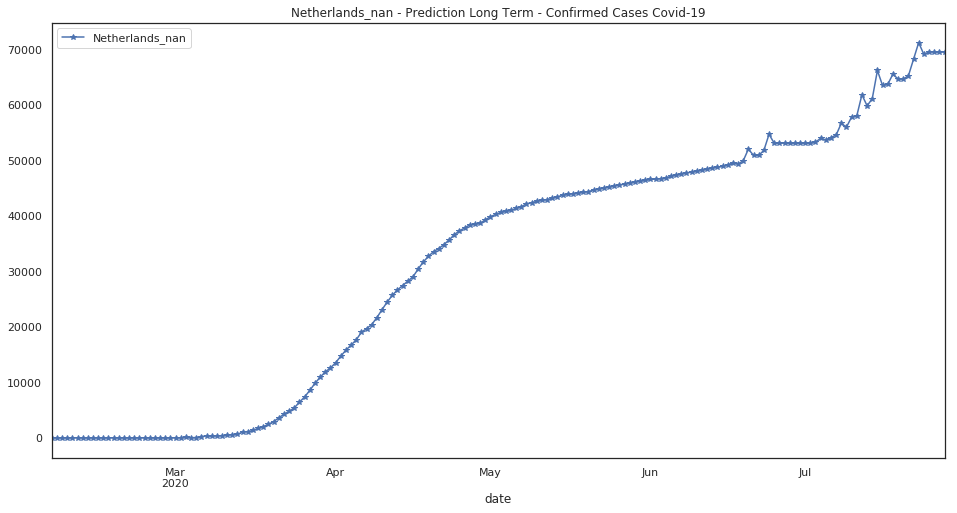

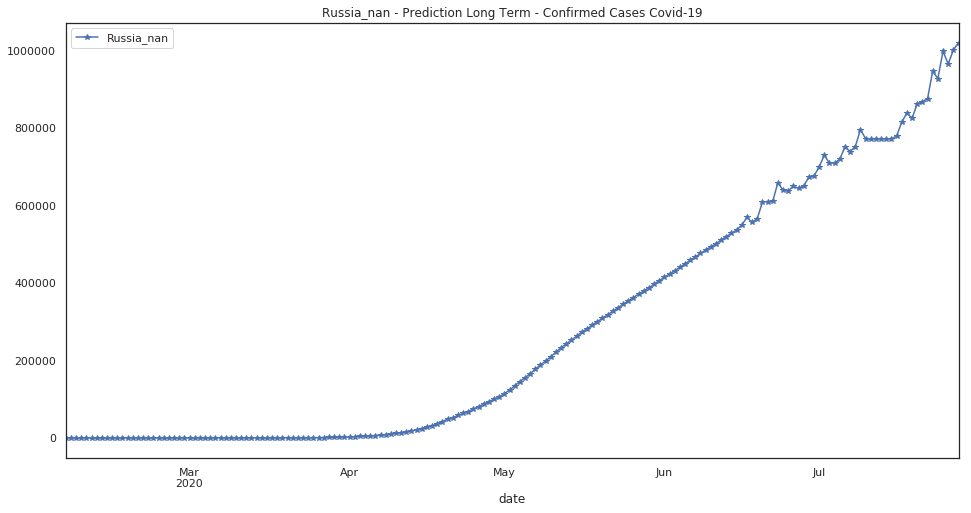

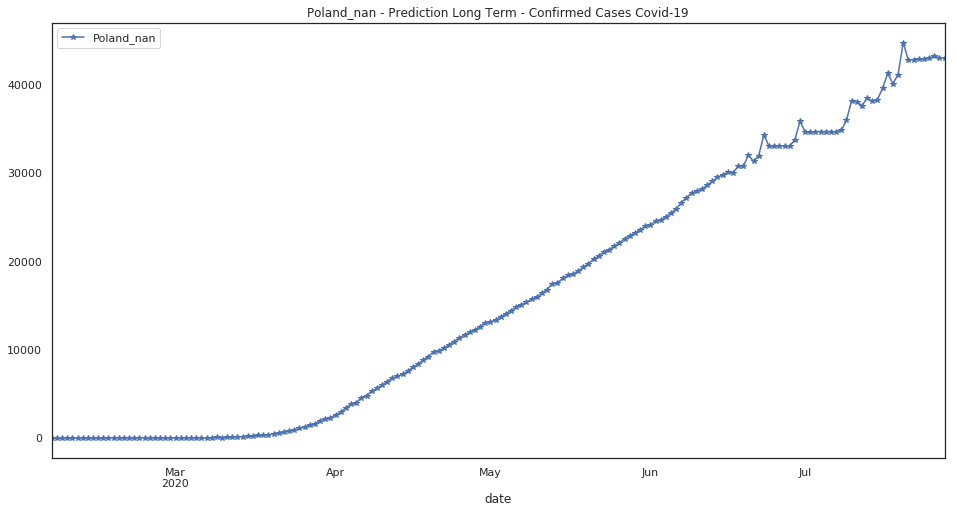

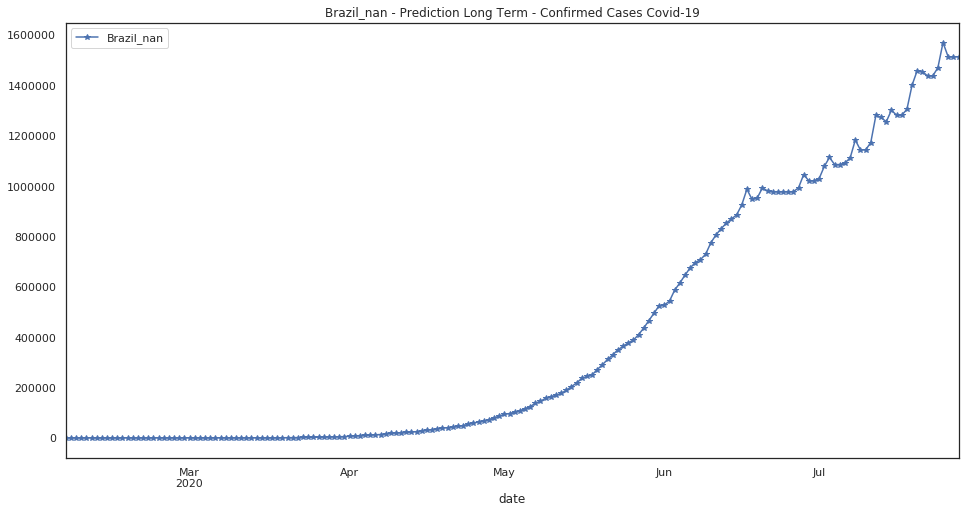

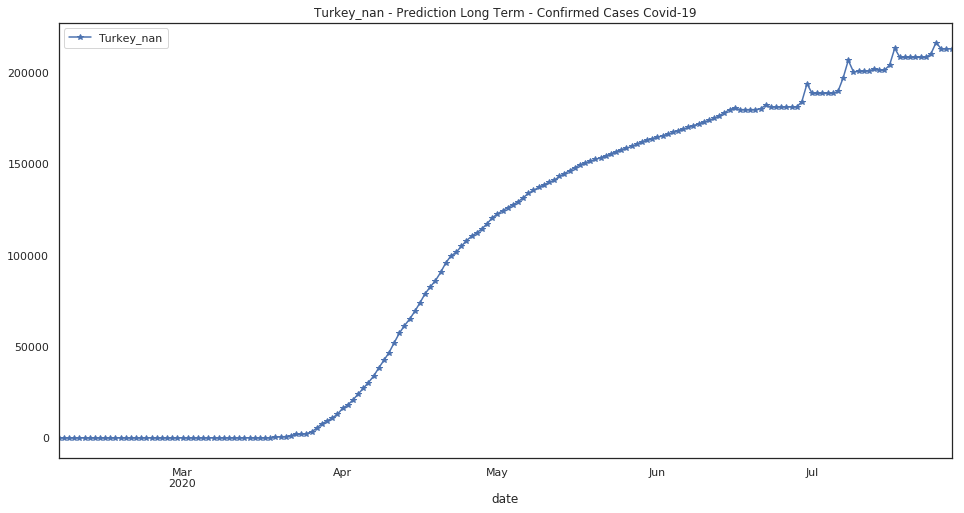

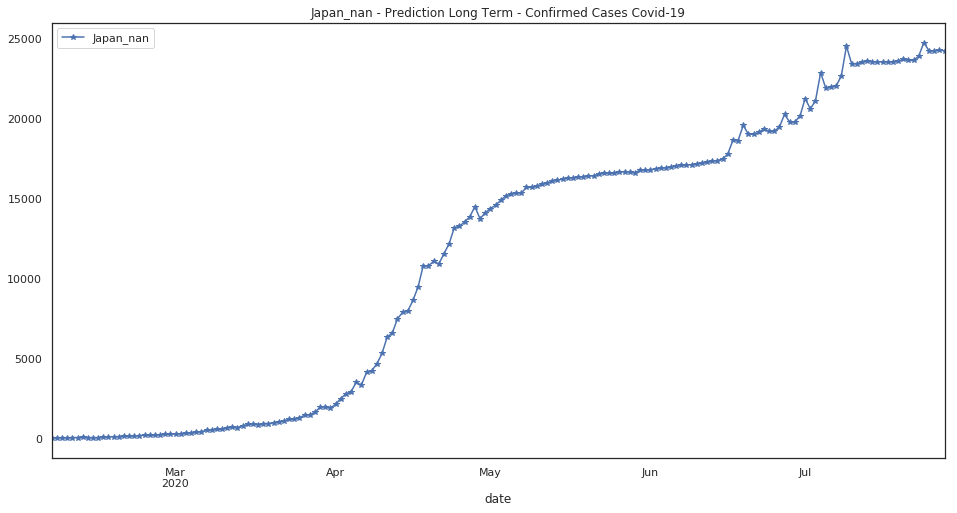

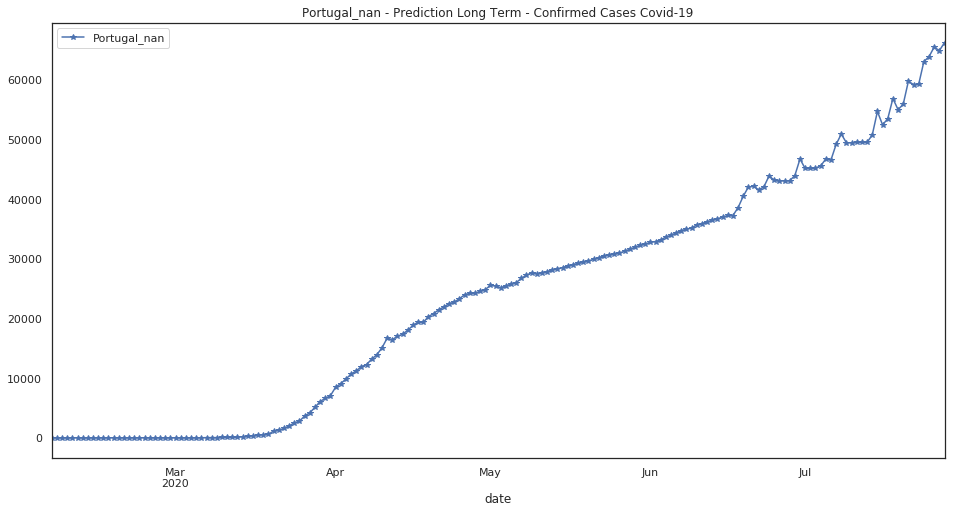

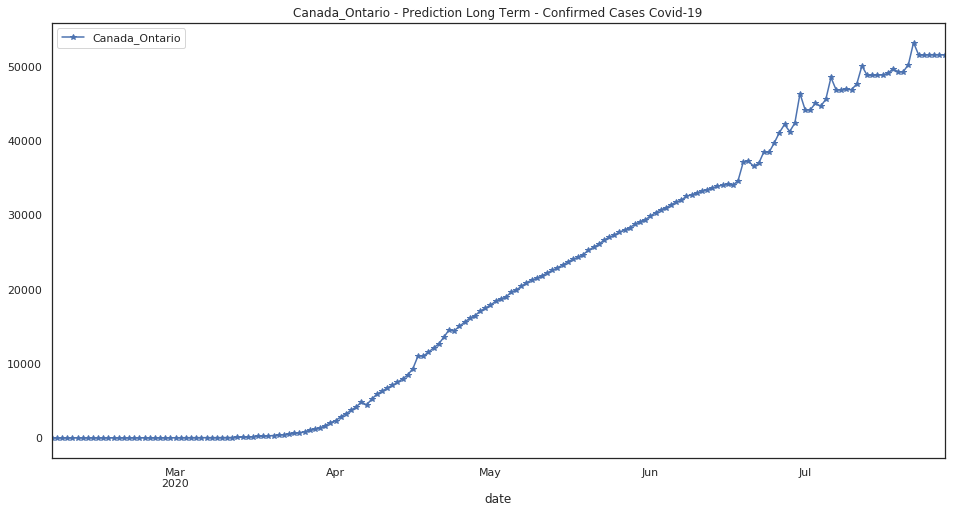

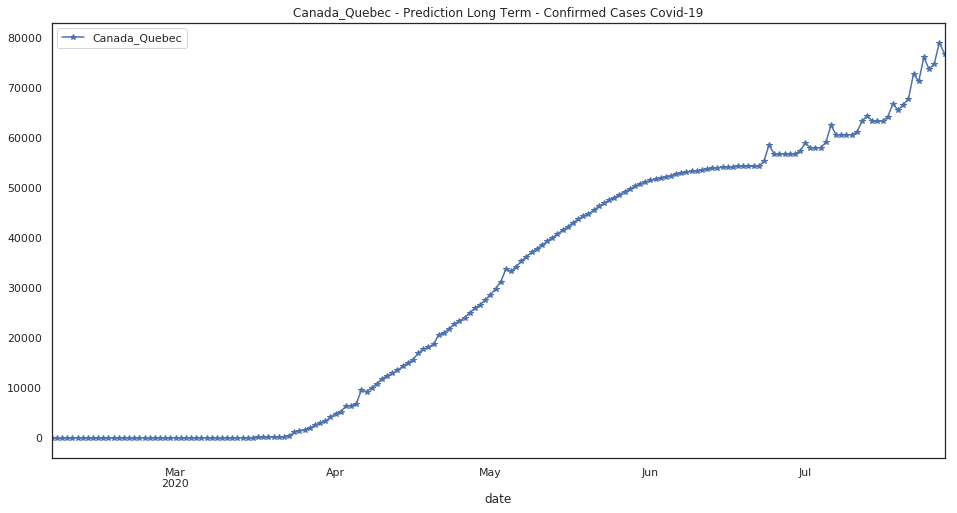

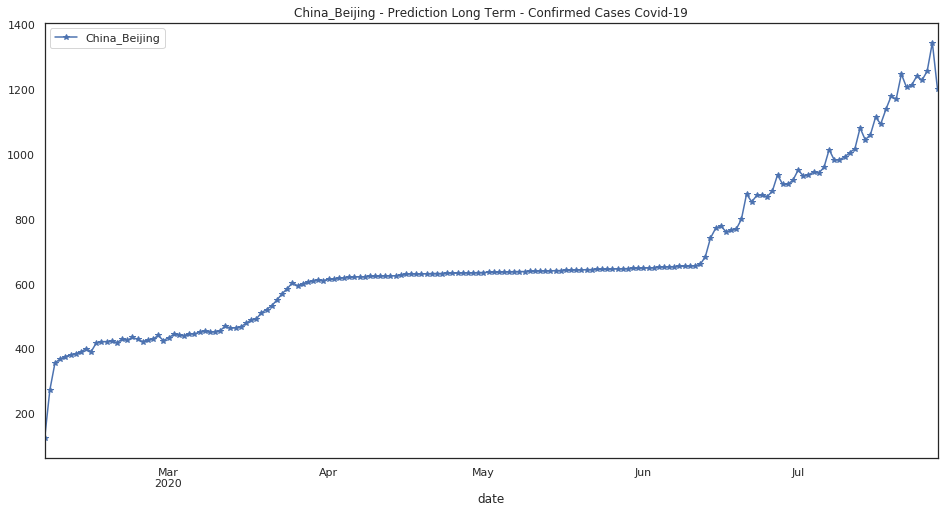

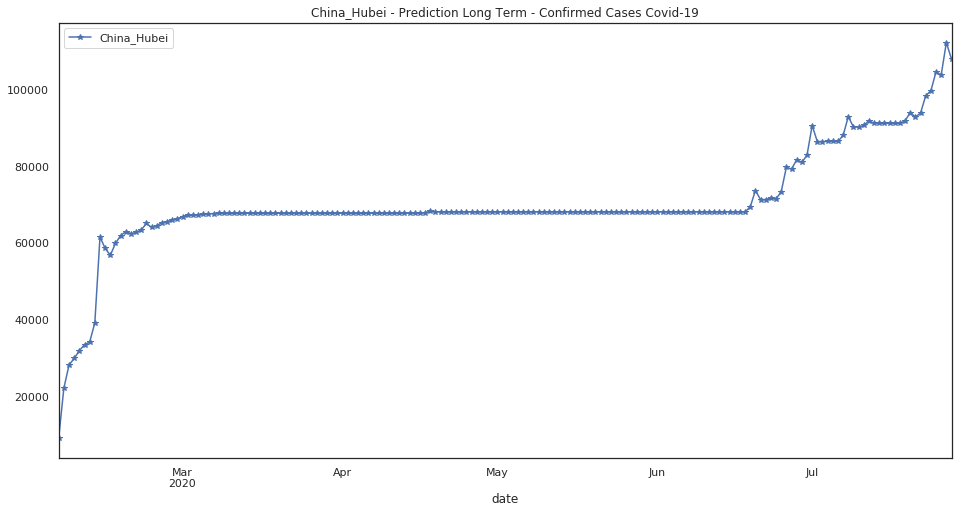

In [75]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan','Portugal_nan',
      'Canada_Ontario','Canada_Quebec','China_Beijing','China_Hubei']
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

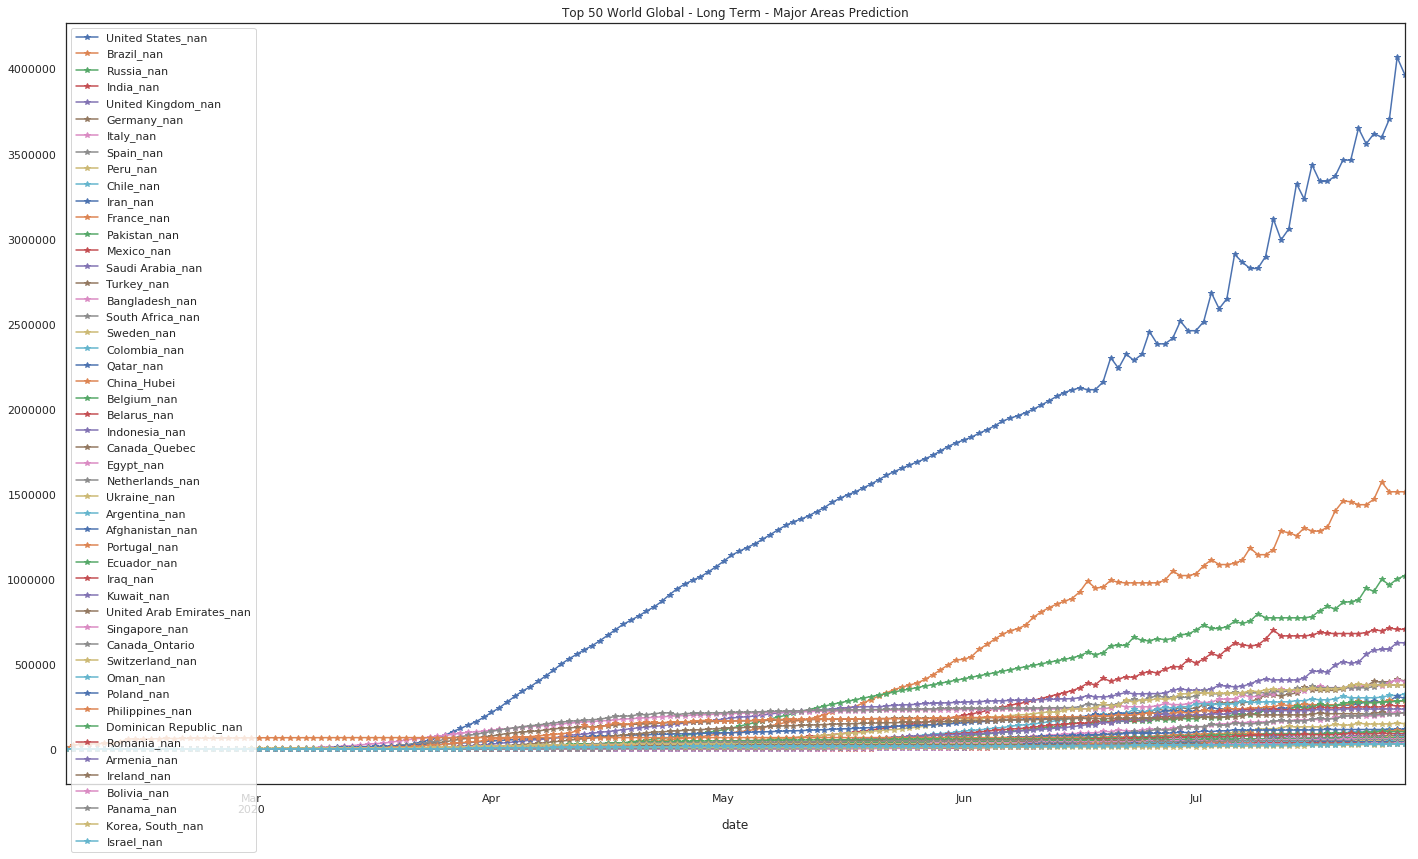

In [76]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

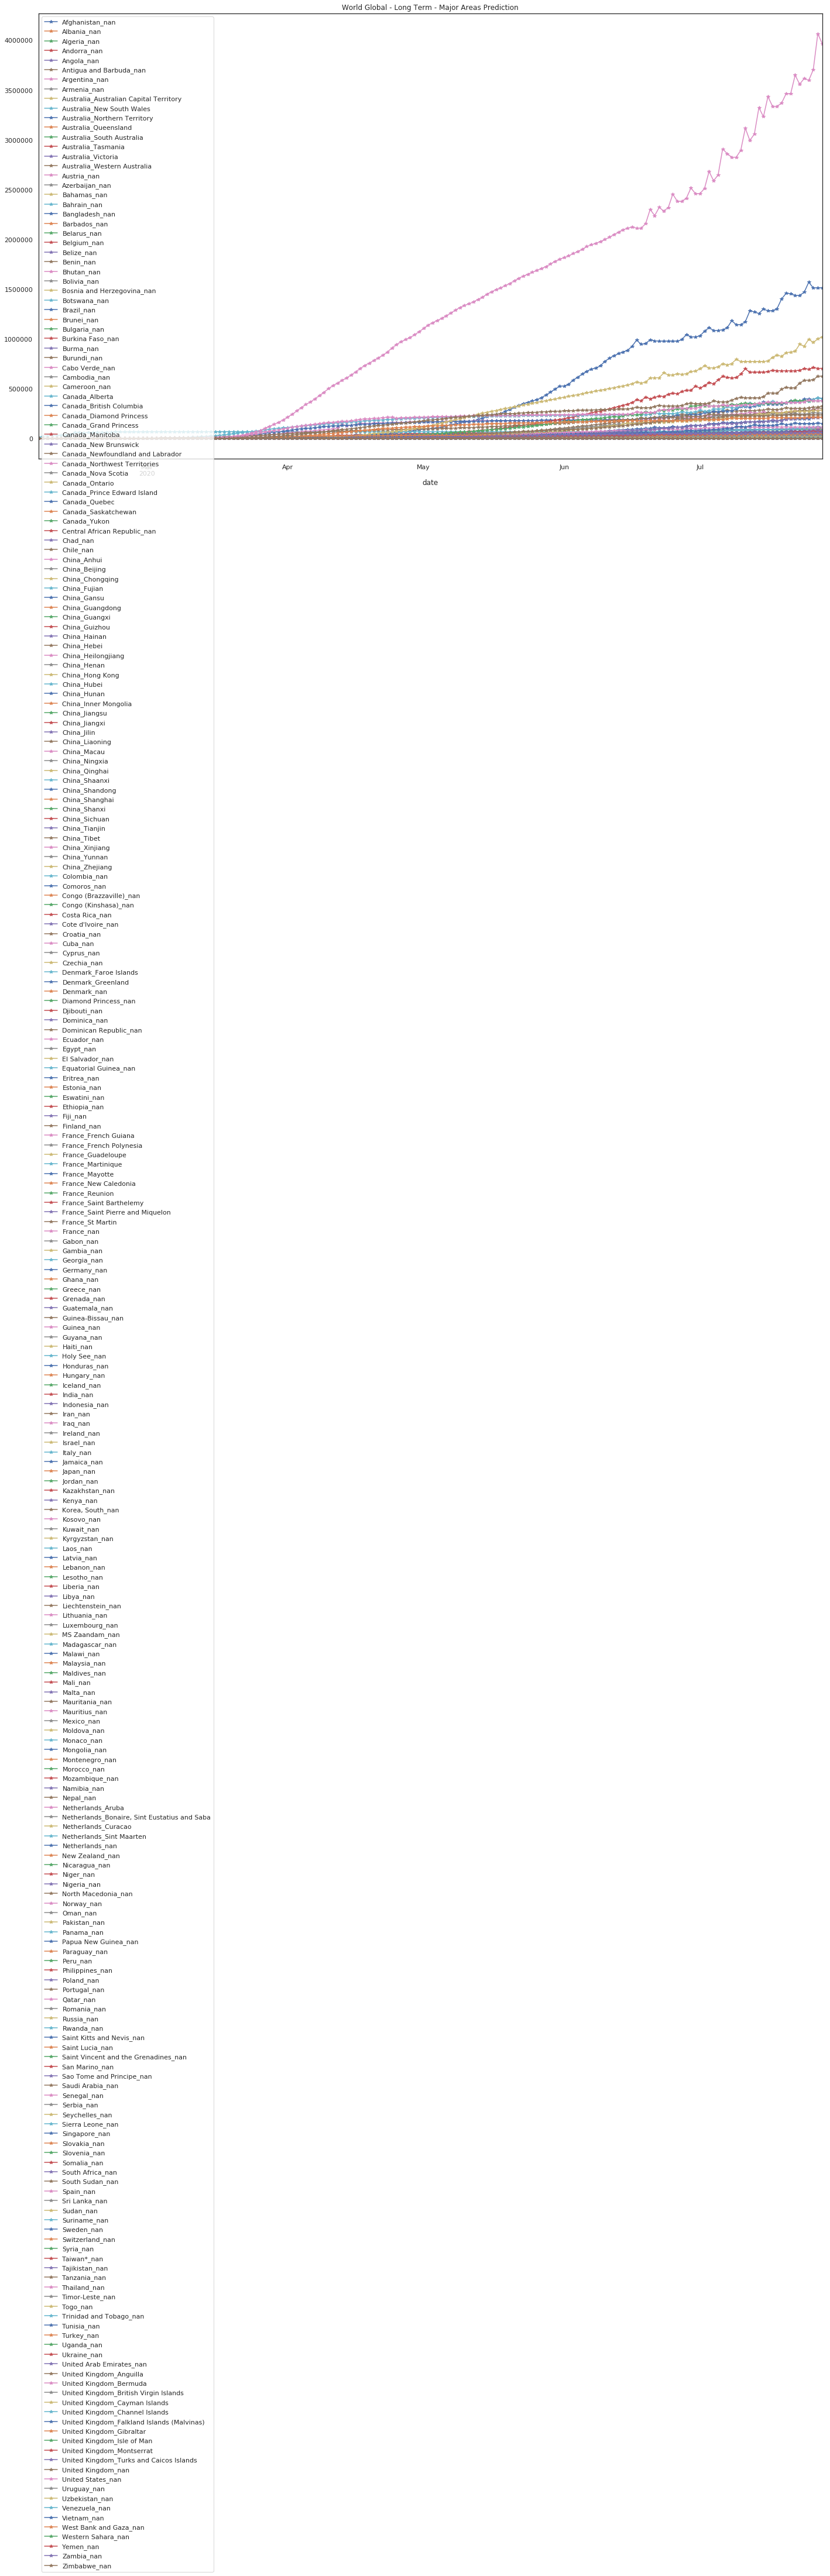

In [77]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [78]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [79]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-22             64.0         93.0        239.0        237.0   
2020-03-23             84.0        111.0        297.0        303.0   
2020-03-24             88.0        129.0        303.0        257.0   
2020-03-25            140.0        153.0        342.0        204.0   
2020-03-26            132.0        181.0        395.0        228.0   
2020-03-27            146.0        206.0        470.0        273.0   
2020-03-28            159.0        205.0        496.0        319.0   
2020-03-29            152.0        217.0        546.0        351.0   
2020-03-30            184.0        234.0        619.0        368.0   
2020-03-31            246.0        246.0        727.0        400.0   
2020-04-01            236.0        270.0        900.0        387.0   
2020-04-02            332.0        283.0       1029.0        417.0   
2020-04-03            336.0        306.0       1189.0        462.0   
2020-04-04            326.0        340.0       1365.0        457.0   
2020-04-05            369.0        370.0       1360.0        499.0   
2020-04-06            430.0        391.0       1440.0        535.0   
2020-04-07            437.0        394.0       1554.0        547.0   
2020-04-08            507.0        398.0       1579.0        564.0   
2020-04-09            509.0        422.0       1723.0        584.0   
2020-04-10            561.0        424.0       1810.0        602.0   
2020-04-11            597.0        433.0       1887.0        612.0   
2020-04-12            635.0        456.0       1940.0        614.0   
2020-04-13            703.0        468.0       2042.0        667.0   
2020-04-14            762.0        489.0       2104.0        654.0   
2020-04-15            811.0        492.0       2206.0        670.0   
2020-04-16            891.0        522.0       2306.0        681.0   
2020-04-17            941.0        548.0       2443.0        679.0   
2020-04-18            998.0        561.0       2608.0        714.0   
2020-04-19           1012.0        563.0       2687.0        710.0   
2020-04-20           1090.0        585.0       2764.0        717.0   
...                     ...          ...          ...          ...   
2020-06-29          35642.0       2048.0      14995.0       1059.0   
2020-06-30          36683.0       2133.0      14992.0       1059.0   
2020-07-01          40451.0       2210.0      15546.0       1076.0   
2020-07-02          40466.0       2146.0      17091.0       1150.0   
2020-07-03          42896.0       2146.0      16136.0       1126.0   
2020-07-04          42335.0       2181.0      16569.0       1126.0   
2020-07-05          46777.0       2276.0      18049.0       1126.0   
2020-07-06          47234.0       2218.0      17201.0       1126.0   
2020-07-07          46434.0       2238.0      17202.0       1126.0   
2020-07-08          48921.0       2311.0      17296.0       1126.0   
2020-07-09          47689.0       2270.0      17604.0       1144.0   
2020-07-10          48826.0       2270.0      18700.0       1224.0   
2020-07-11          52765.0       2274.0      18292.0       1187.0   
2020-07-12          50709.0       2319.0      18378.0       1201.0   
2020-07-13          50851.0       2465.0      19189.0       1214.0   
2020-07-14          50933.0       2380.0      18750.0       1284.0   
2020-07-15          50927.0       2383.0      19059.0       1254.0   
2020-07-16          51946.0       2388.0      20235.0       1277.0   
2020-07-17          55149.0       2388.0      20060.0       1274.0   
2020-07-18          53280.0       2388.0      19790.0       1274.0   
2020-07-19          54109.0       2388.0      19858.0       1323.0   
2020-07-20          57379.0       2387.0      19940.0       1353.0   
2020-07-21          55598.0       2387.0      20455.0       1336.0   
2020-07-22          56186.0       2387.0      21402.0       1348.0   
2020-07-23

In [80]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [81]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [82]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [83]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                                      Laos_nan  19.856270  102.495496   
241                                     Libya_nan  26.335100   17.228331   
242                        West Bank and Gaza_nan  31.952200   35.233200   
243                             Guinea-Bissau_nan  11.803700  -15.180400   
244                                      Mali_nan  17.570692   -3.996166   
245                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
246                  Canada_Northwest Territories  64.825500 -124.845700   
247                                  Canada_Yukon  64.282300 -135.000000   
248                                    Kosovo_nan  42.602636   20.902977   
249                                     Burma_nan  21.916200   95.956000   
250                       United Kingdom_Anguilla  18.220600  -63.068600   
251         United Kingdom_British Virgin Islands  18.420700  -64.640000   
252       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
253                                MS Zaandam_nan   0.000000    0.000000   
254                                  Botswana_nan -22.328500   24.684900   
255                                   Burundi_nan  -3.373100   29.918900   
256                              Sierra Leone_nan   8.460555  -11.779889   
257  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
258                                    Malawi_nan -13.254308   34.301525   
259    United K

In [84]:
#!pip install folium
import folium
import re

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [85]:
#
region_m2=region + [
                    #'Andorra_nan','Monaco_nan','San Marino_nan',
                    'Ireland_nan','Austria_nan','Slovenia_nan','Slovakia_nan','Czechia_nan','Romania_nan'
                    'Hungary_nan','Ukraine_nan','Croatia_nan','Finland_nan','Norway_nan','Estonia_nan','Denmark_nan','Greece_nan',
                    'Chile_nan','Argentina_nan','Mexico_nan','Ecuador_nan','Peru_nan','Colombia_nan','Costa Rica_nan',
                    'South Africa_nan','Saudi Arabia_nan','Israel_nan','Japan_nan',
                    #'Morocco_nan','Algeria_nan',
                    'Pakistan_nan','Bangladesh_nan','China_Beijing',
                    'Singapore_nan','Canada_British Columbia']
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                     region      Lat      Long  2020-02-06 00:00:00  \
0       6              Argentina_nan -38.4161  -63.6167                  6.0   
1       9  Australia_New South Wales -33.8688  151.2093                 21.0   
2      16                Austria_nan  47.5162   14.5501                  6.0   
3      20             Bangladesh_nan  23.6850   90.3563                  6.0   
4      23                Belgium_nan  50.8333    4.0000                 28.0   
5      28                 Brazil_nan -14.2350  -51.9253                  6.0   
6      36    Canada_British Columbia  49.2827 -123.1207                 12.0   
7      42             Canada_Ontario  51.2538  -85.3232                 11.0   
8      44              Canada_Quebec  52.9399  -73.5491                  6.0   
9      48                  Chile_nan -35.6751  -71.5430                  6.0   
10     50              China_Beijing  40.1824  116.4142                126.0   
11     61            China_Hong Kong  22.3000  114.2000                 24.0   
12     62                China_Hubei  30.9756  112.2707               9123.0   
13     69                China_Macau  22.1667  113.5500                 20.0   
14     82               Colombia_nan   4.5709  -74.2973                  6.0   
15     85             Costa Rica_nan   9.7489  -83.7534                  6.0   
16     87                Croatia_nan  45.1000   15.2000                  6.0   
17     91                Czechia_nan  49.8175   15.4730                  6.0   
18     94                Denmark_nan  56.2639    9.5018                  6.0   
19     97                Ecuador_nan  -1.8312  -78.1834                  6.0   
20    102                Estonia_nan  58.5953   25.0136                  6.0   
21    106                Finland_nan  64.0000   26.0000                 18.0   
22    116                 France_nan  46.2276    2.2137                 30.0   
23    121                Germany_nan  51.0000    9.0000                 20.0   
24    123                 Greece_nan  39.0742   21.8243                  6.0   
25    132                  India_nan  21.0000   78.0000                 33.0   
26    134                   Iran_nan  32.0000   53.0000                  6.0   
27    136                Ireland_nan  53.1424   -7.6921                  6.0   
28    137                 Israel_nan  31.0000   35.0000                  6.0   
29    138                  Italy_nan  43.0000   12.0000                 28.0   
30    140                  Japan_nan  36.0000  138.0000                 29.0   
31    144           Korea, South_nan  36.0000  128.0000                 38.0   
32    160                 Mexico_nan  23.6345 -102.5528                  6.0   
33    171            Netherlands_nan  52.1326    5.2913                  6.0   
34    177                 Norway_nan  60.4720    8.4689                  6.0   
35    179               Pakistan_nan  30.3753   69.3451                  6.0   
36    183                   Peru_nan  -9.1900  -75.0152                  6.0   
37    185                 Poland_nan  51.9194   19.1451                  6.0   
38    186               Portugal_nan  39.3999   -8.2245                 23.0   
39    189                 Russia_nan  60.0000   90.0000                 53.0   
40    194           Saudi Arabia_nan  24.0000   45.0000                  6.0   
41    198              Singapore_nan   1.2833  103.8333                 40.0   
42    199               Slovakia_nan  48.6690   19.6990                  6.0   
43    200               Slovenia_nan  46.1512   14.9955                  6.0   
44    202           South Africa_nan -30.5595   22.9375                  6.0   
45    203                  Spain_nan  40.0000   -4.0000                 24.0   
46    207                 Sweden_nan  63.0000   16.0000                 27.0   
47    208            Switzerland_nan  46.8182    8.2275                  6.0   
48    209                Taiwan*_nan  23.7000  121.0000                 13.0   
49  

In [86]:
import folium
import re

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [87]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [88]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [89]:
exit()

H2O session _sid_9e25 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
